**Title of ML project : Bank Marketing**

Name : Vaishnavi R

Organization : Entri Elevate

Date : 20-01-2025

Table Of Contents
01. Overview of Problem Statement
02. Objective
03. Data Description
04. Data Collection
05. Data Preprocessing - Data Cleaning
06. Exploratory Data Analysis (EDA)
07. Feature Engineering
08. Feature Selection
09. Split Data into Training and Testing Sets
10. Feature Scaling
11. Build the ML Model
12. Model Evaluation
13. Hyperparameter Tuning
14. Save the Model
15. Test with Unseen Data
16. Interpretation of Results (Conclusion)
17. Future Work

# 1. Overview of Problem Statement

The goal of this project is to help the bank predict if a customer will sign up for a term deposit after a marketing campaign. By understanding which customers are more likely to subscribe, the bank can target the right audience and make the campaign more successful.

The dataset includes:

Customer Information: Age, job, marital status, education level.
Financial Details: Account balance and loan information.
Campaign Contact Info: How and when the customer was last contacted, and the result of past campaigns.

Expected Outcome

A model that accurately predicts customer subscription likelihood.
Insights into the key factors that impact customer decisions, which can help the bank improve future marketing strategies.

# 2. Objective

Objectives

Main Goal: Build a model that predicts whether a customer will subscribe to a term deposit (either "yes" or "no").

Additional Insight: Find out which factors (like age, job, or previous campaign contact) are most important in influencing a customer’s decision to subscribe.

# 3. Data Description
[DATA](https://archive.ics.uci.edu/dataset/222/bank+marketing)

Input variables:

Bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

Related with the last contact of the current campaign:

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

Other attributes:

  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):

  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# 4. Data Collection

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('/content/bank-full - bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [50]:
# Displays the first few rows (default 5) of the DataFrame for a quick overview.

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [51]:
# Displays the last few rows (default 5) of the DataFrame for a quick overview.

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [52]:
# Renames the column y to Term Deposit in the DataFrame df, directly modifying the original DataFrame without creating a new one.

df.rename(columns={'y': 'Term Deposit'}, inplace=True)

In [53]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Term Deposit'],
      dtype='object')

# 5. Data Preprocessing - Data Cleaning


In [54]:
# df.shape returns a tuple representing the dimensions of the DataFrame df, where:
# The first value is the number of rows (observations).
# The second value is the number of columns (features).

df.shape

(45211, 17)

In [55]:
# Returns the total number of elements in the DataFrame (rows × columns).

df.size

768587

In [56]:
# Provides a summary of the DataFrame, including the number of non-null entries, data types, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  Term Deposit  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [57]:
# Generates summary statistics for numerical columns in the DataFrame, including count, mean, standard deviation, min, max, and quartiles.

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [58]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [59]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [60]:
# Returns the total number of missing (NaN) values for each column in the DataFrame.

df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [61]:
# Returns the number of unique values in each column of the DataFrame.

df.nunique()

,0
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


In [62]:
# Returns the total number of duplicate rows in the DataFrame.

df.duplicated().sum()

0

In [63]:
# Creates a list of column names from the DataFrame df that have the data type "O" (Object),
#which typically represents categorical variables in pandas.

categorical = [var for var in df.columns if df[var].dtype == "O"]
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Term Deposit']

In [64]:
# Returns the first 5 rows of the DataFrame df for only the categorical columns (those with data type "O").

df[categorical].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Term Deposit
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [65]:
# Iterates over each categorical feature in the categorical list and prints the feature name along with the number of unique categories
#(unique values) in that feature.

for feature in categorical:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is Term Deposit and number of categories are 2


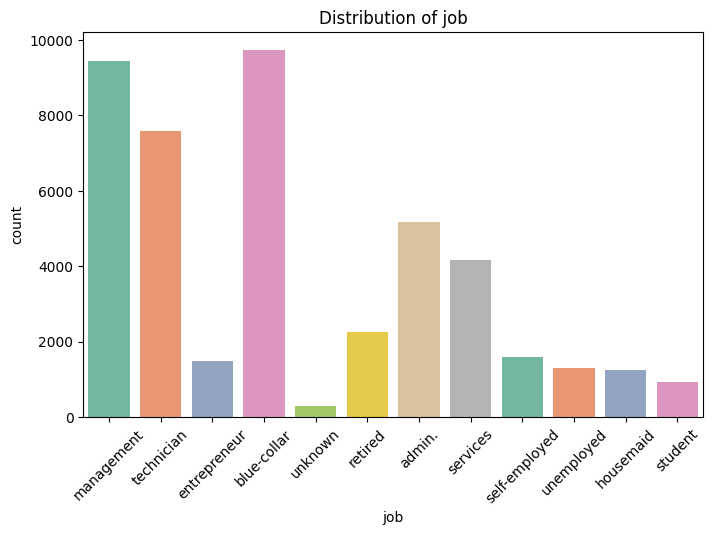

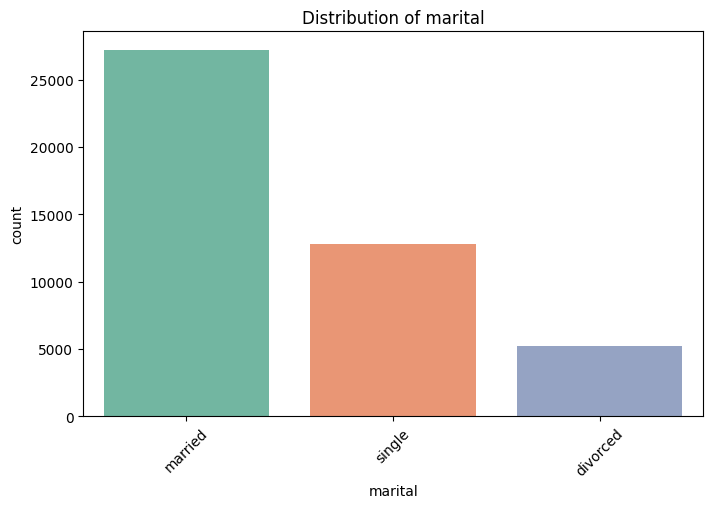

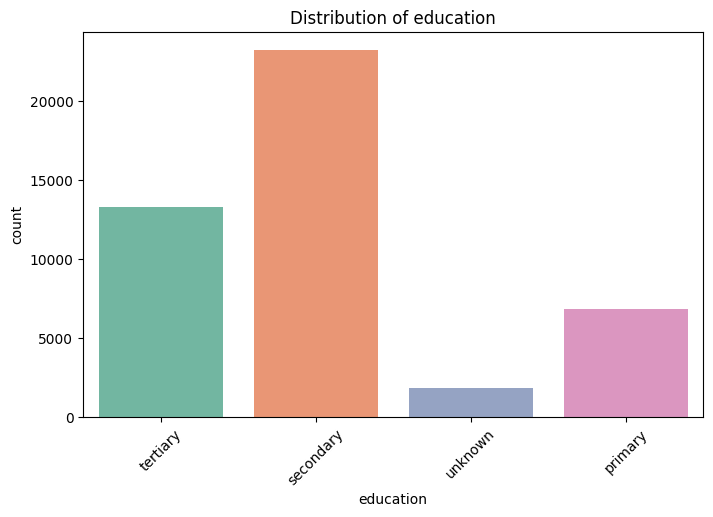

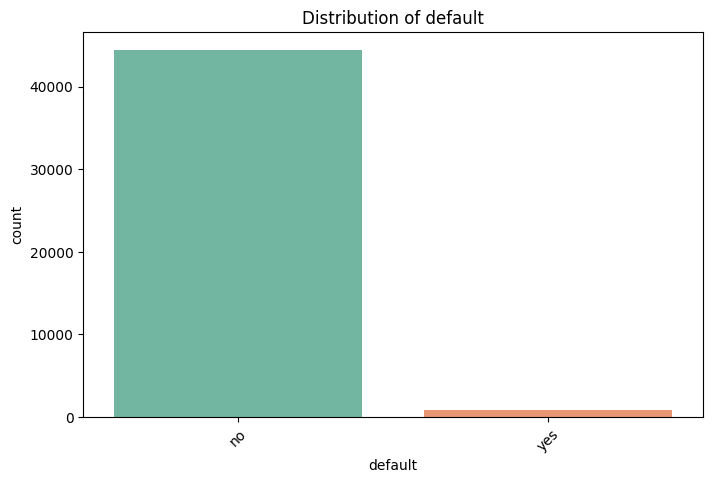

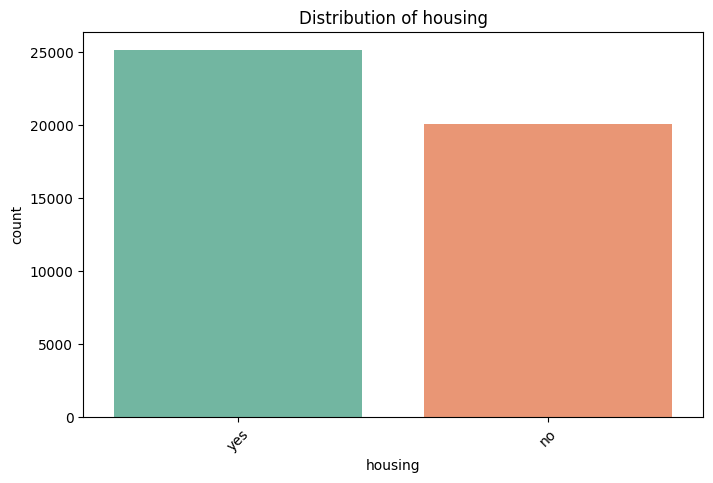

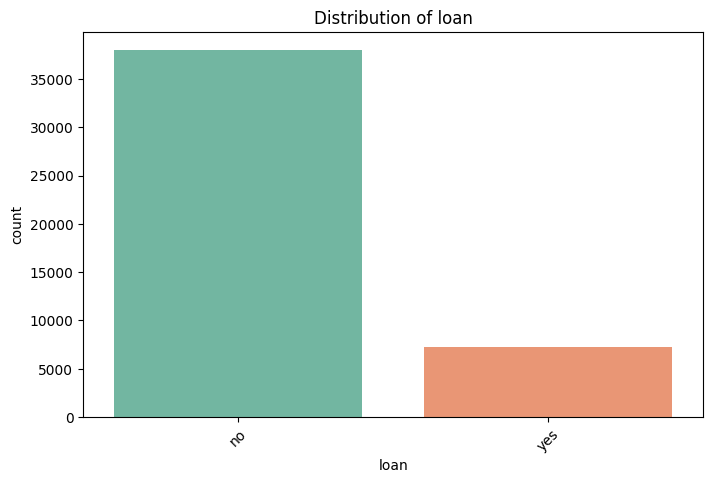

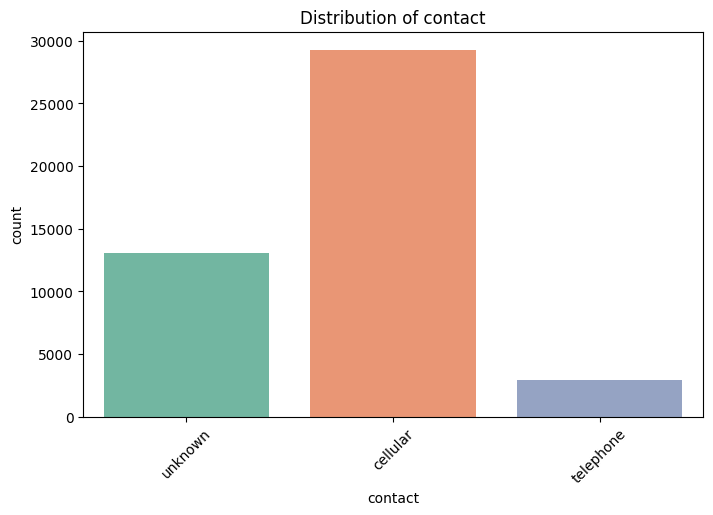

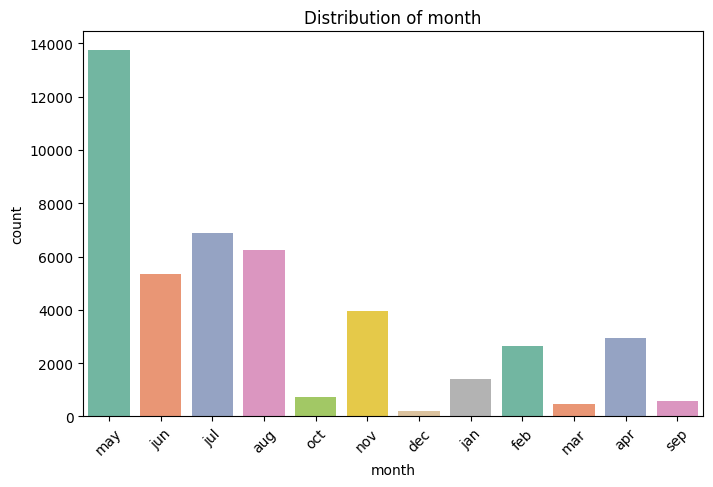

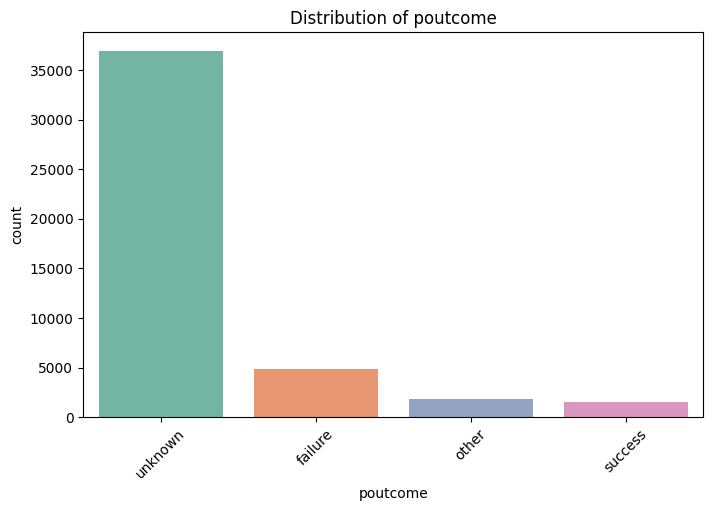

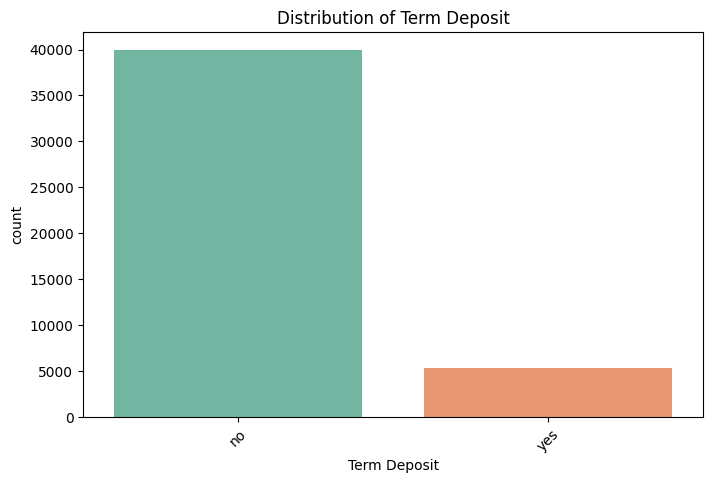

In [66]:
# Visualizing the distribution of values in each categorical feature, helping to understand the frequency of each category.

# Import seaborn's color palette
palette = sns.color_palette("Set2")

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette=palette)  # Apply the color palette
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

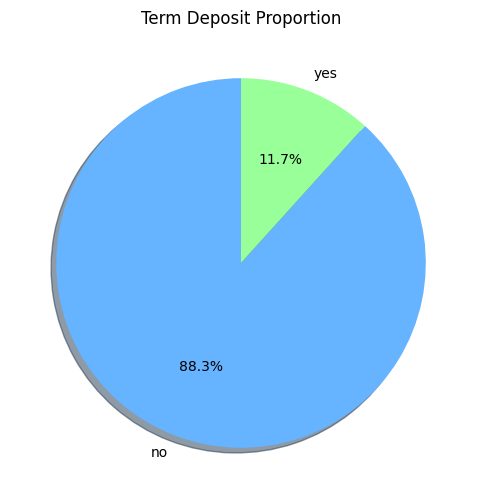

In [67]:
# Represent the proportion of subscriptions to a term deposit (e.g., "yes" vs "no" or similar values) in a pie chart,
# which makes it easy to understand the distribution between categories.

plt.figure(figsize=(8, 6))
df['Term Deposit'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90, shadow=True)
plt.title('Term Deposit Proportion')
plt.ylabel('')
plt.show()

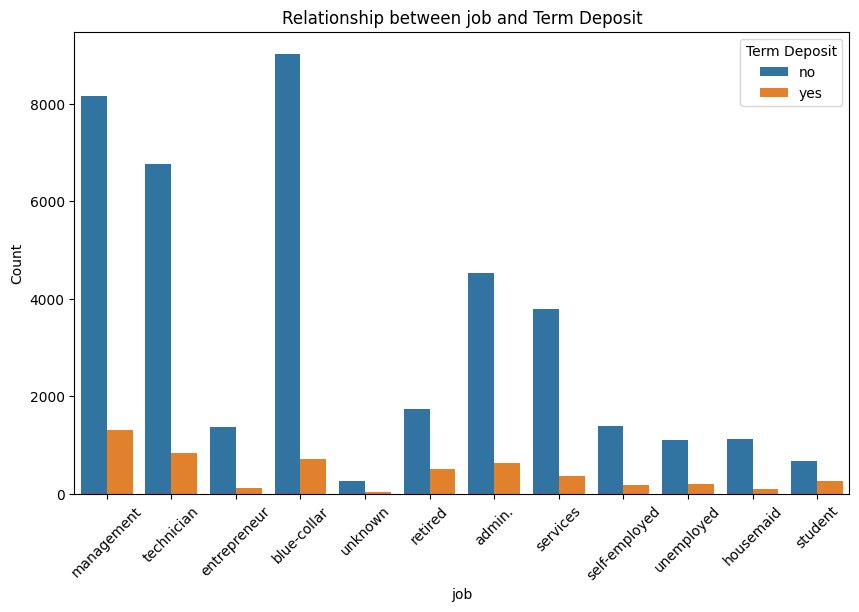

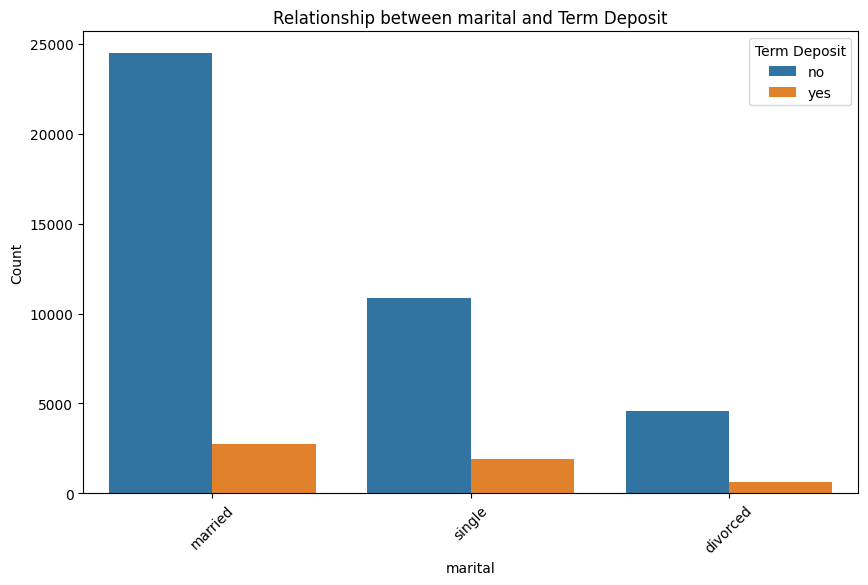

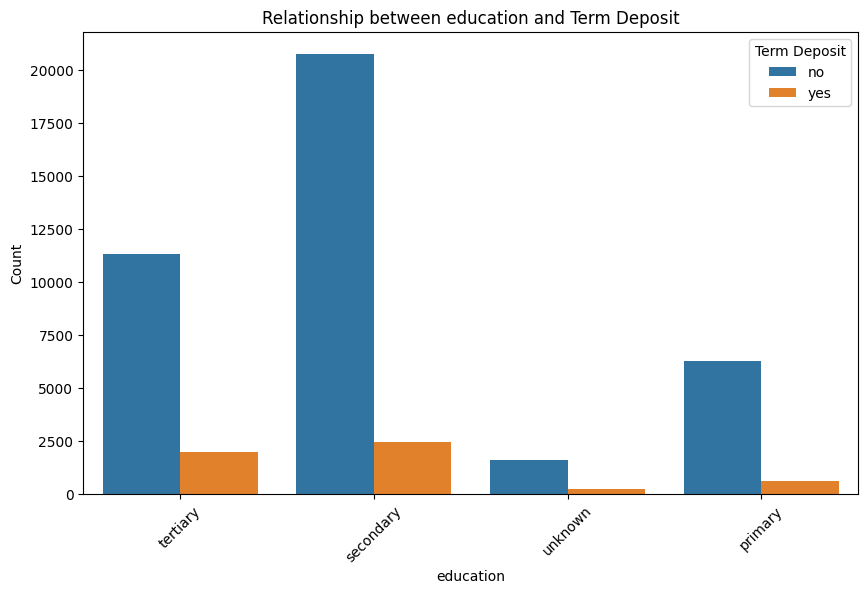

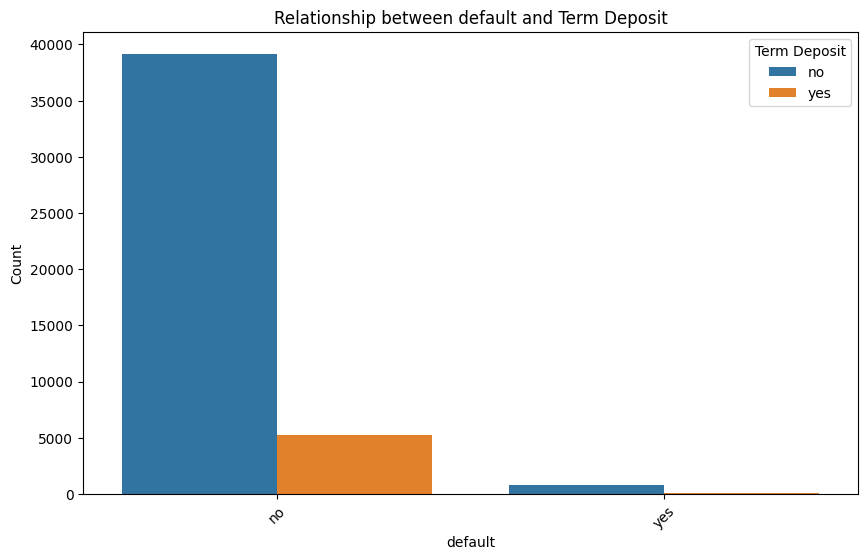

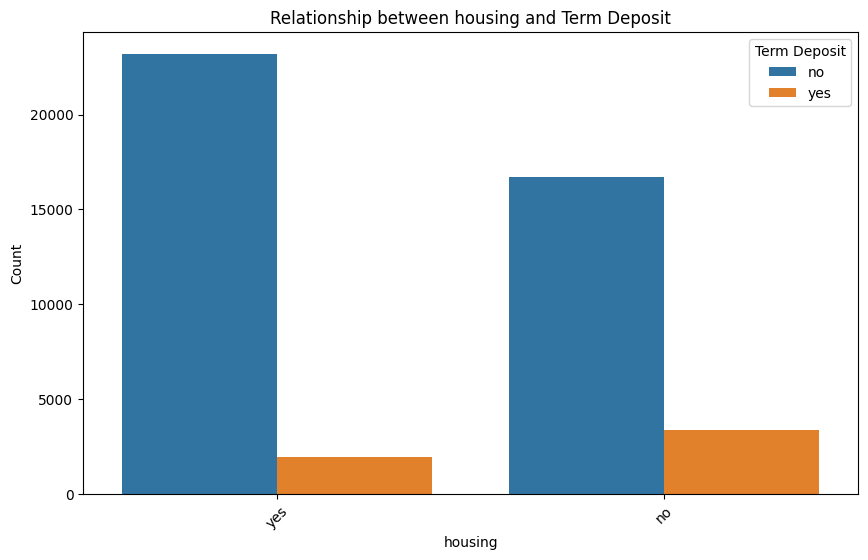

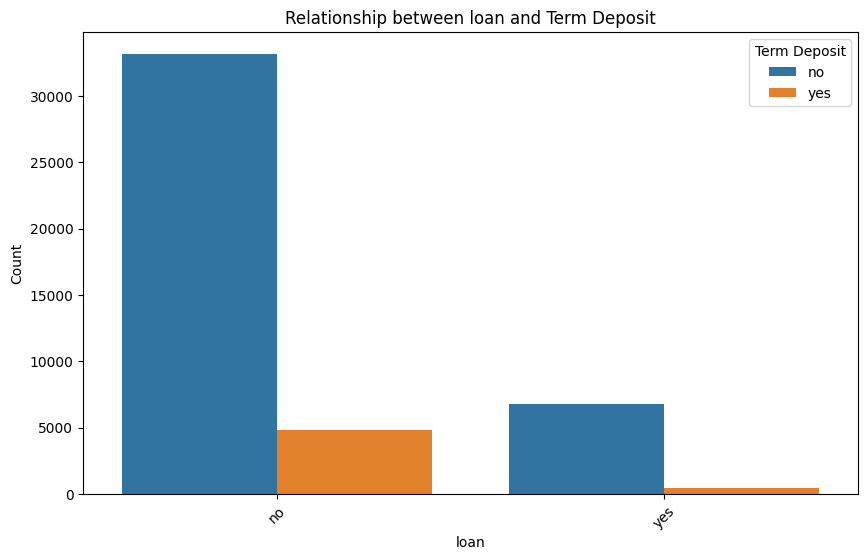

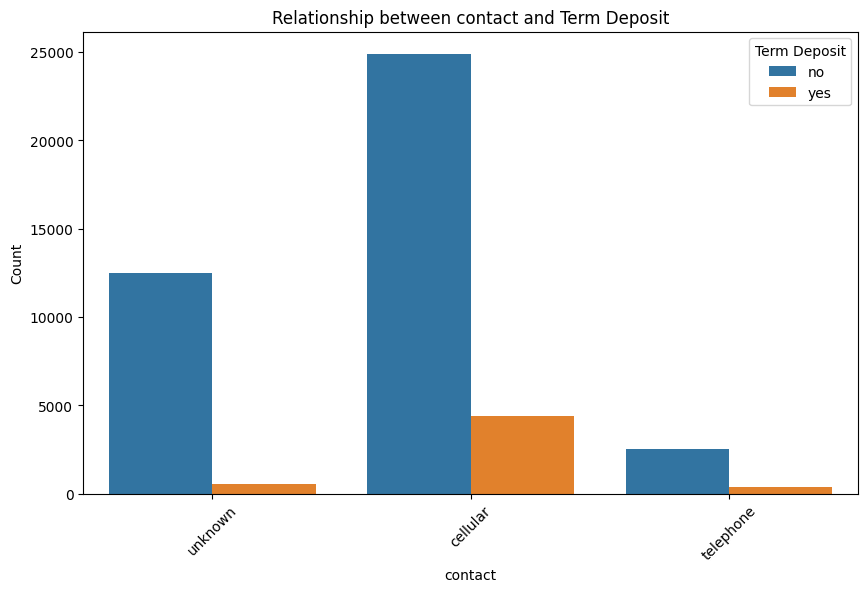

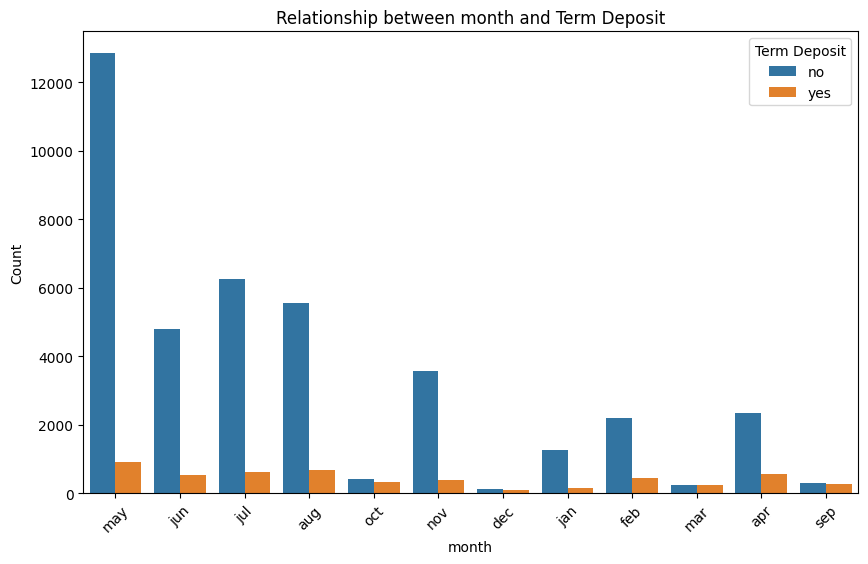

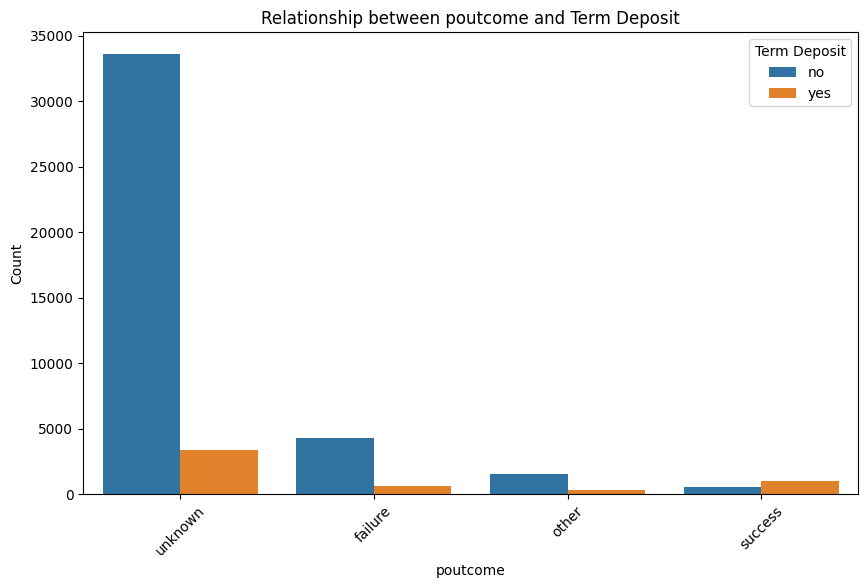

In [68]:
# Visualize how each categorical feature relates to the target variable Term Deposit,
# showing patterns or trends between the categories and whether someone subscribed to a term deposit.

# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Iterate over each categorical feature and create a count plot split by the target variable
for categorical_feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_feature, hue='Term Deposit', data=df)
    plt.title(f'Relationship between {categorical_feature} and Term Deposit')
    plt.xticks(rotation=45)
    plt.xlabel(categorical_feature)
    plt.ylabel('Count')
    plt.legend(title='Term Deposit')
    plt.show()


In [69]:
# Display how the Term Deposit variable is distributed across different categories of each categorical feature.
#It helps understand the relationship between the features and whether certain categories are more likely to subscribe to a term deposit.

for categorical_feature in categorical_features:
    print(f"Counts of target variable split by {categorical_feature}:")

    # Group data, count occurrences, reshape to table, and fill missing values (all in one line)
    counts = df.groupby([categorical_feature, 'Term Deposit']).size().unstack().fillna(0)
    print(counts)
    print()

Counts of target variable split by job:
Term Deposit     no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

Counts of target variable split by marital:
Term Deposit     no   yes
marital                  
divorced       4585   622
married       24459  2755
single        10878  1912

Counts of target variable split by education:
Term Deposit     no   yes
education                
primary        6260   591
secondary     20752  2450
tertiary      11305  1996
unknown        1605   252

Counts of target variable split by default:
Term Deposit     no   yes
default                  
no            39159  5237
yes             763    52

Counts of target variable split by housing:
Term Deposit     no   ye

In [70]:
# Identify and display numerical features in the dataset, excluding the target variable (Term Deposit),
# helps ensure you're focusing on the input features that contribute to making predictions, not the outcome itself.

numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Term Deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [71]:
# Identifying and counting discrete numerical features, which typically have a limited set of possible values,
# helping in differentiating them from continuous variables. This distinction can be useful for further analysis or for choosing appropriate models.

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


The output Discrete Variables Count: 0 means that none of the numerical features in your DataFrame have fewer than 25 unique values.

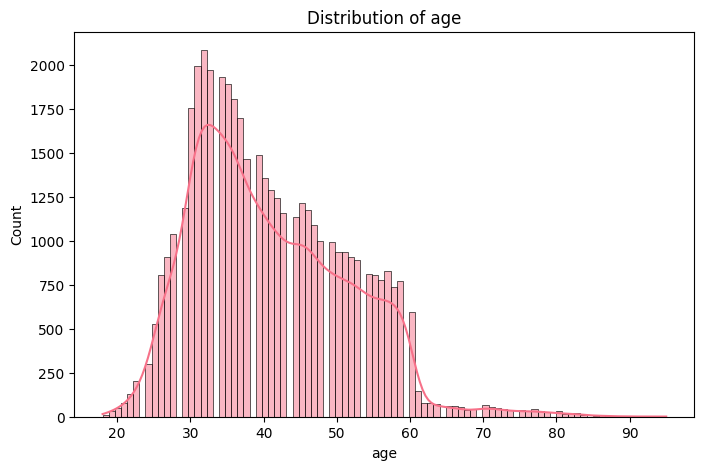

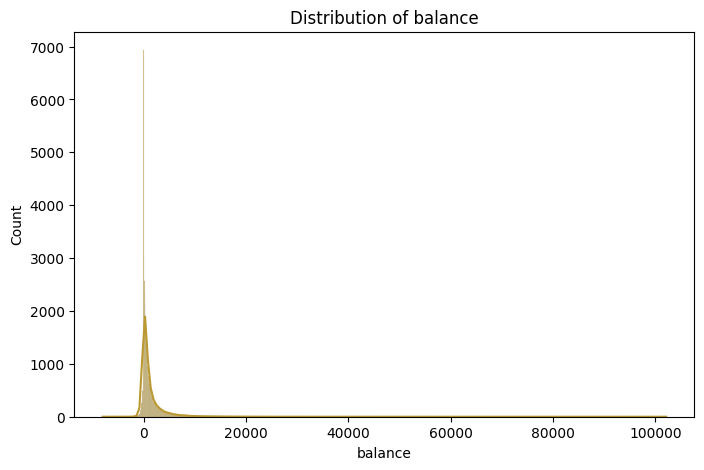

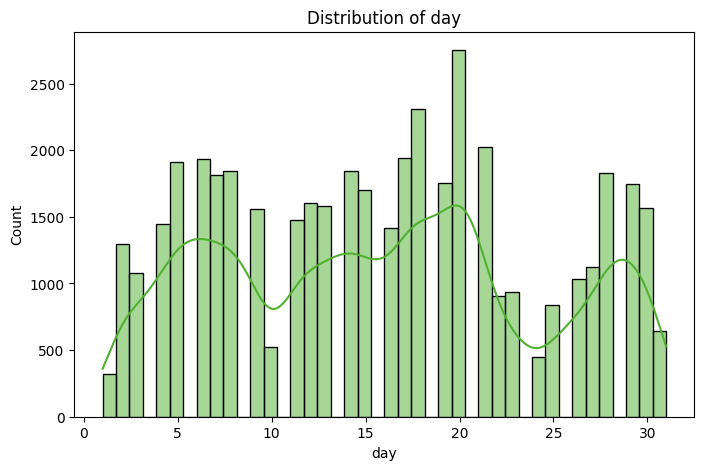

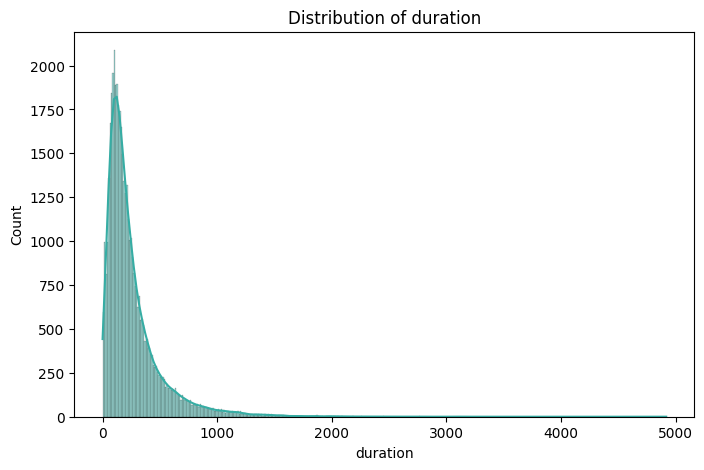

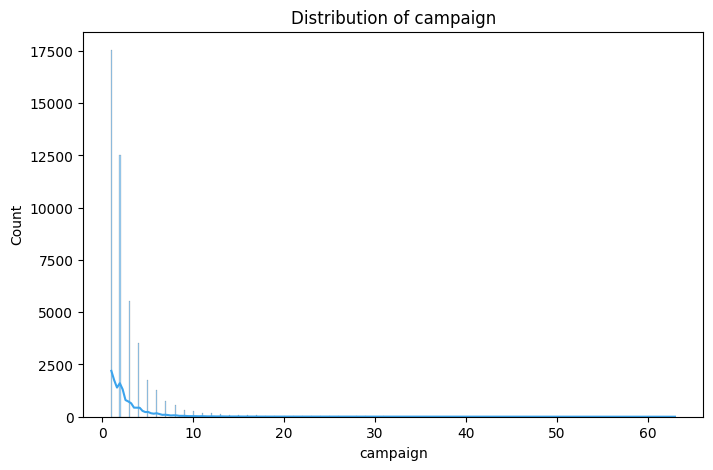

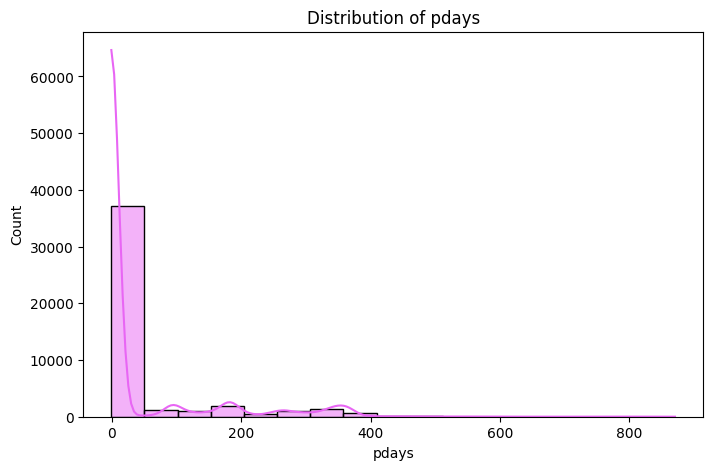

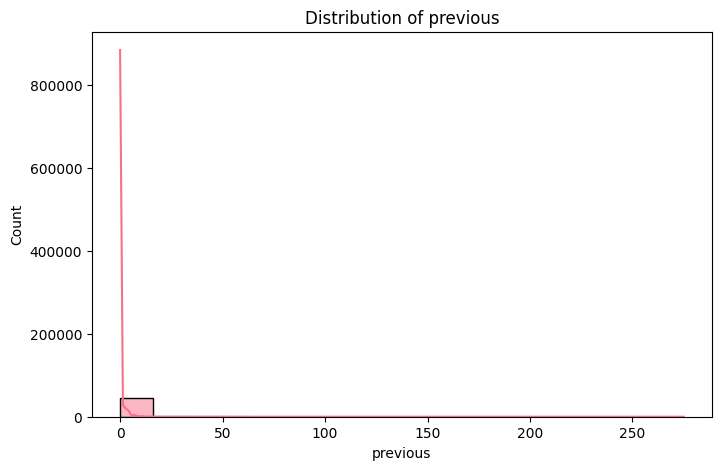

In [72]:
#  Visualize the distribution of each numerical column using histograms with Kernel Density Estimate (KDE) curves.
# The different colors help differentiate the plots when there are multiple columns.
# This visualization helps in understanding the data's spread, skewness, and distribution patterns for each feature.

# Using a Seaborn color palette

palette = sns.color_palette("husl")

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numerical_cols):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color=palette[i % len(palette)])
    plt.title(f'Distribution of {col}')
    plt.show()




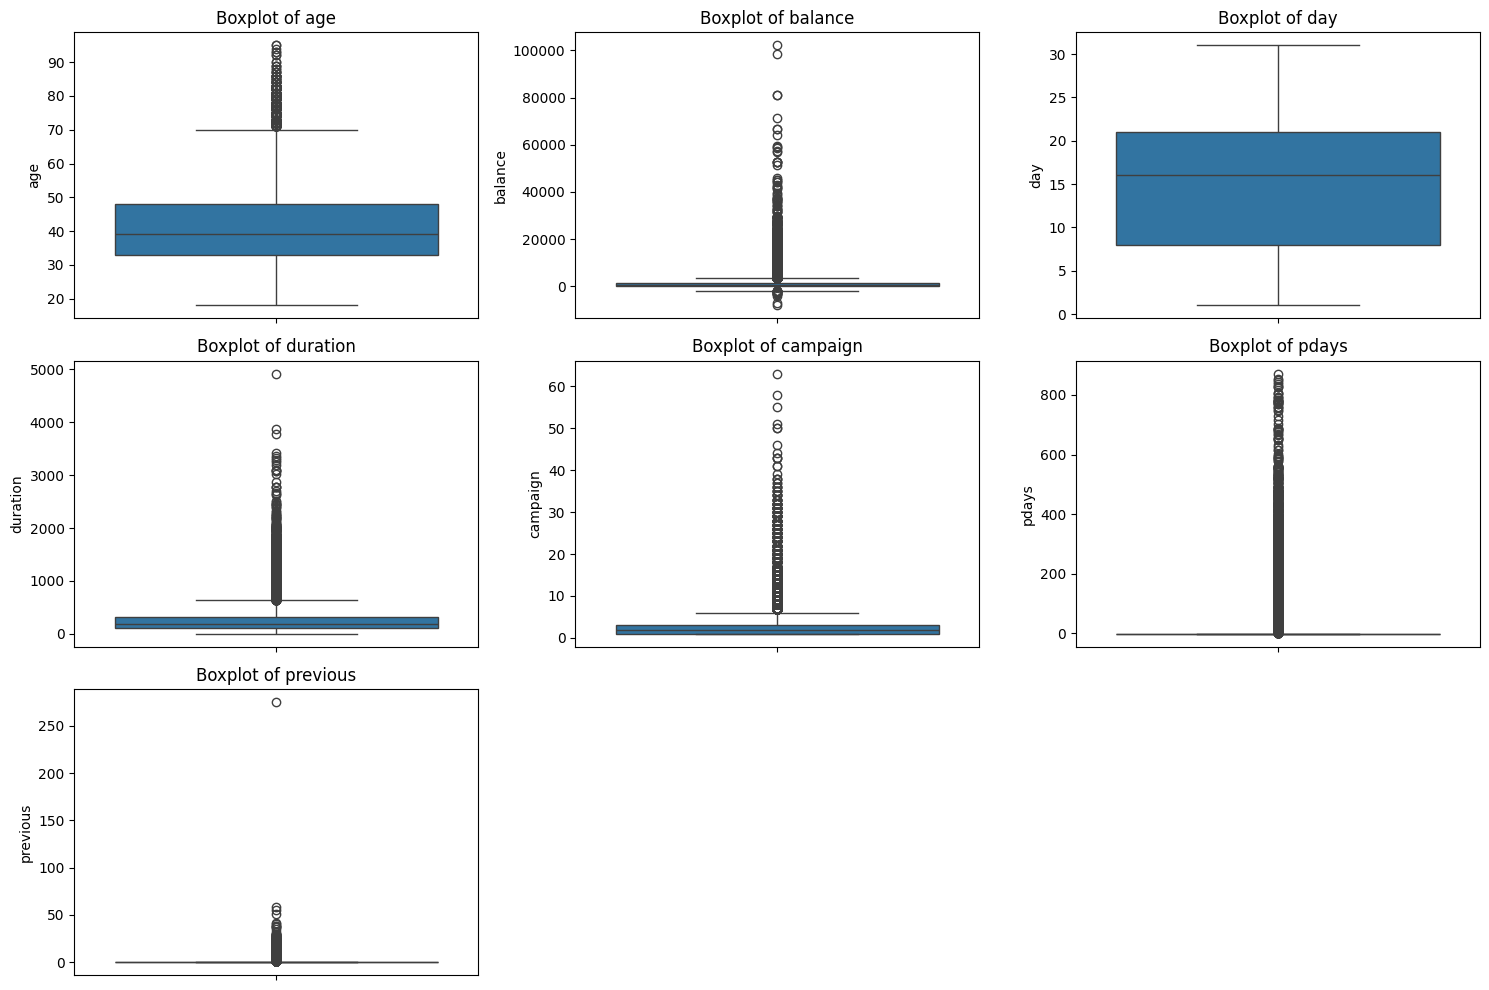

In [73]:
# Boxplots for each of the numerical columns in your dataset to check for outliers.

# List of numerical columns to check for outliers
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust subplot grid size if necessary
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


The IQR method is a common statistical technique for detecting and removing outliers.

In [74]:
# Function to remove outliers using the Interquartile Range (IQR) method and
# then applies it to all the numerical columns, except for the 'day' column.

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

# Remove outliers for numerical columns
for col in numerical_columns:
    if col != 'day':  # Skip 'day' as it doesn't have outliers
        df = remove_outliers(df, col)

print("Outliers removed.")


Outliers removed.


Plot boxplots for each numerical column after removing the outliers. This will help you visually confirm that the outliers were effectively removed.

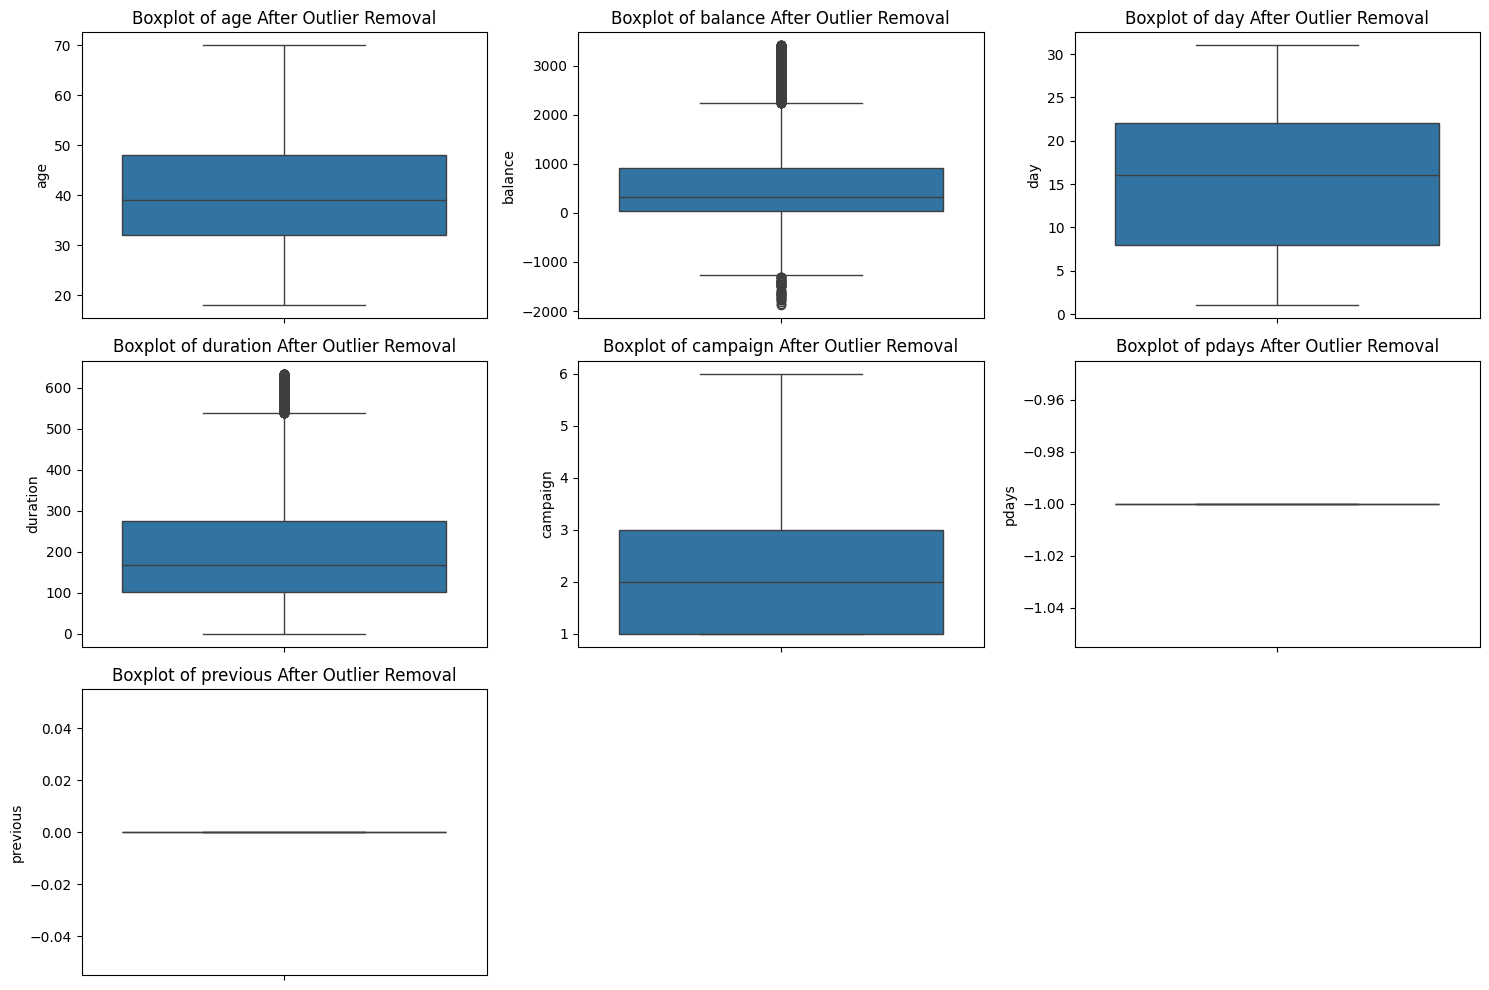

In [75]:
# Plotting boxplots for each numerical column after removing outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust subplot grid size if necessary
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column} After Outlier Removal')

plt.tight_layout()
plt.show()


Skewness helps understand the shape of the distribution. If the data is highly skewed, you may need to apply transformations (like log transformation) to make the data more normal, which could improve the performance of certain machine learning models.

In [76]:
# Check skewness for all numerical columns in the DataFrame
skewness = df.select_dtypes(include=['float64', 'int64']).skew()

# Display skewness values
print("Skewness for all numerical columns:")
print(skewness)


Skewness for all numerical columns:
age         0.384961
balance     1.333048
day         0.108141
duration    1.019869
campaign    1.153599
pdays       0.000000
previous    0.000000
dtype: float64


Insights:

* Columns like balance, duration, campaign, and previous are right-skewed, meaning they have longer right tails.

* pdays and previous have no skew, indicating their distributions are symmetric.

* age and day are slightly right-skewed, but the skewness is small and close to zero, meaning they are almost symmetric.

Applies a log transformation to the columns that have positive skewed columns

In [77]:
# Apply log transformation to positively skewed columns
df['balance'] = np.log1p(df['balance'])  # Using log1p to handle zero or small values
df['duration'] = np.log1p(df['duration'])
df['campaign'] = np.log1p(df['campaign'])

# Check skewness again after transformation
print("Skewness after log transformation:")
print(df.select_dtypes(include=['float64', 'int64']).skew())

Skewness after log transformation:
age         0.384961
balance          NaN
day         0.108141
duration   -0.837116
campaign    0.560751
pdays       0.000000
previous    0.000000
dtype: float64


Insights after the log transformation:

* balance: The skewness is now NaN, likely due to zero or negative values. You'll need to handle these values before applying the log transformation.
* duration: The skewness decreased to -0.84, showing a shift from right skew to left skew, but significantly reduced overall.
* campaign: The skewness decreased to 0.56, indicating less positive skew.
* Other Columns (age, day, pdays, previous): Skewness remained largely unchanged, indicating the log transformation had little effect on these features.

The below code is about addressing the issue of log transformation for columns that might contain zero or negative values, which can cause errors or result in invalid results like NaN.

In [78]:
# Add a small constant to avoid log(0) or log(negative values)
df['balance'] = np.log1p(df['balance'].clip(lower=0))  # Clip values to >= 0

# Recheck skewness after this adjustment
print("Skewness after fixing balance column:")
print(df.select_dtypes(include=['float64', 'int64']).skew())


Skewness after fixing balance column:
age         0.384961
balance    -1.985034
day         0.108141
duration   -0.837116
campaign    0.560751
pdays       0.000000
previous    0.000000
dtype: float64


Insights:
* The balance column now has a negative skew after the transformation, but it is much more normalized compared to its original skew.
* Other columns like duration and campaign also show improvements in skewness after the transformation.

In [79]:
#Check for Non-Finite Values:

#First, check if there are any NaN or infinite values in the balance column.

print(df['balance'].isna().sum())  # Check for NaN values
print(np.isinf(df['balance']).sum())  # Check for infinite values


2740
0


The result indicates that there are 2740 NaN values in the balance column, but no infinite values (0 infinite values).

In [80]:
#Handle Missing or Infinite Values:

#If there are NaN values, you can either drop them or fill them with a suitable value (e.g., the mean or median).
#If there are infinite values, you can replace them with a large finite value.

# Replace NaN with the median (or any other suitable value)
df['balance'] = df['balance'].fillna(df['balance'].median())


Yeo-Johnson transformation is a powerful method for transforming skewed data into a more normally distributed form while allowing both positive and negative values.

Yeo-Johnson transformation is relevant in this case because:

The skewness value of -1.985034 suggests the distribution is highly skewed.

In [81]:
#Apply Yeo-Johnson Transformation Again:

#Once the non-finite values have been handled, you can try applying the Yeo-Johnson transformation.

from scipy import stats  # Import stats module from scipy

# Apply Yeo-Johnson transformation to 'balance'
df['balance'], _ = stats.yeojohnson(df['balance'])

# Recheck skewness
print("Skewness after Yeo-Johnson transformation:")
print(df.select_dtypes(include=['float64', 'int64']).skew())


Skewness after Yeo-Johnson transformation:
age         0.384961
balance    -0.908226
day         0.108141
duration   -0.837116
campaign    0.560751
pdays       0.000000
previous    0.000000
dtype: float64


The Yeo-Johnson transformation has effectively reduced the skewness in the balance column, and the other columns now have skewness values closer to 0, which is ideal for many machine learning algorithms

#6. Exploratory Data Analysis(EDA)


In [82]:
##1. Gain Insights into Data Distribution and Relationships

# 1. Summary statistics for numerical columns
print("Summary Statistics (Numerical Columns):")
print(df.describe())

# 2. Data types and non-null counts
print("\nData Types and Non-null Counts:")
print(df.info())

# 3. Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 4. Number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Summary Statistics (Numerical Columns):
                age       balance           day      duration      campaign  \
count  28069.000000  28069.000000  28069.000000  28069.000000  28069.000000   
mean      40.363461     33.736069     15.770744      5.070497      1.082756   
std        9.883276     15.440738      8.357648      0.779507      0.381327   
min       18.000000      0.000000      1.000000      0.000000      0.693147   
25%       32.000000     27.264873      8.000000      4.624973      0.693147   
50%       39.000000     37.126623     16.000000      5.129899      1.098612   
75%       48.000000     44.580805     22.000000      5.624018      1.386294   
max       70.000000     56.632798     31.000000      6.453625      1.945910   

         pdays  previous  
count  28069.0   28069.0  
mean      -1.0       0.0  
std        0.0       0.0  
min       -1.0       0.0  
25%       -1.0       0.0  
50%       -1.0       0.0  
75%       -1.0       0.0  
max       -1.0       0.0  

Data

6.1. Visualisation


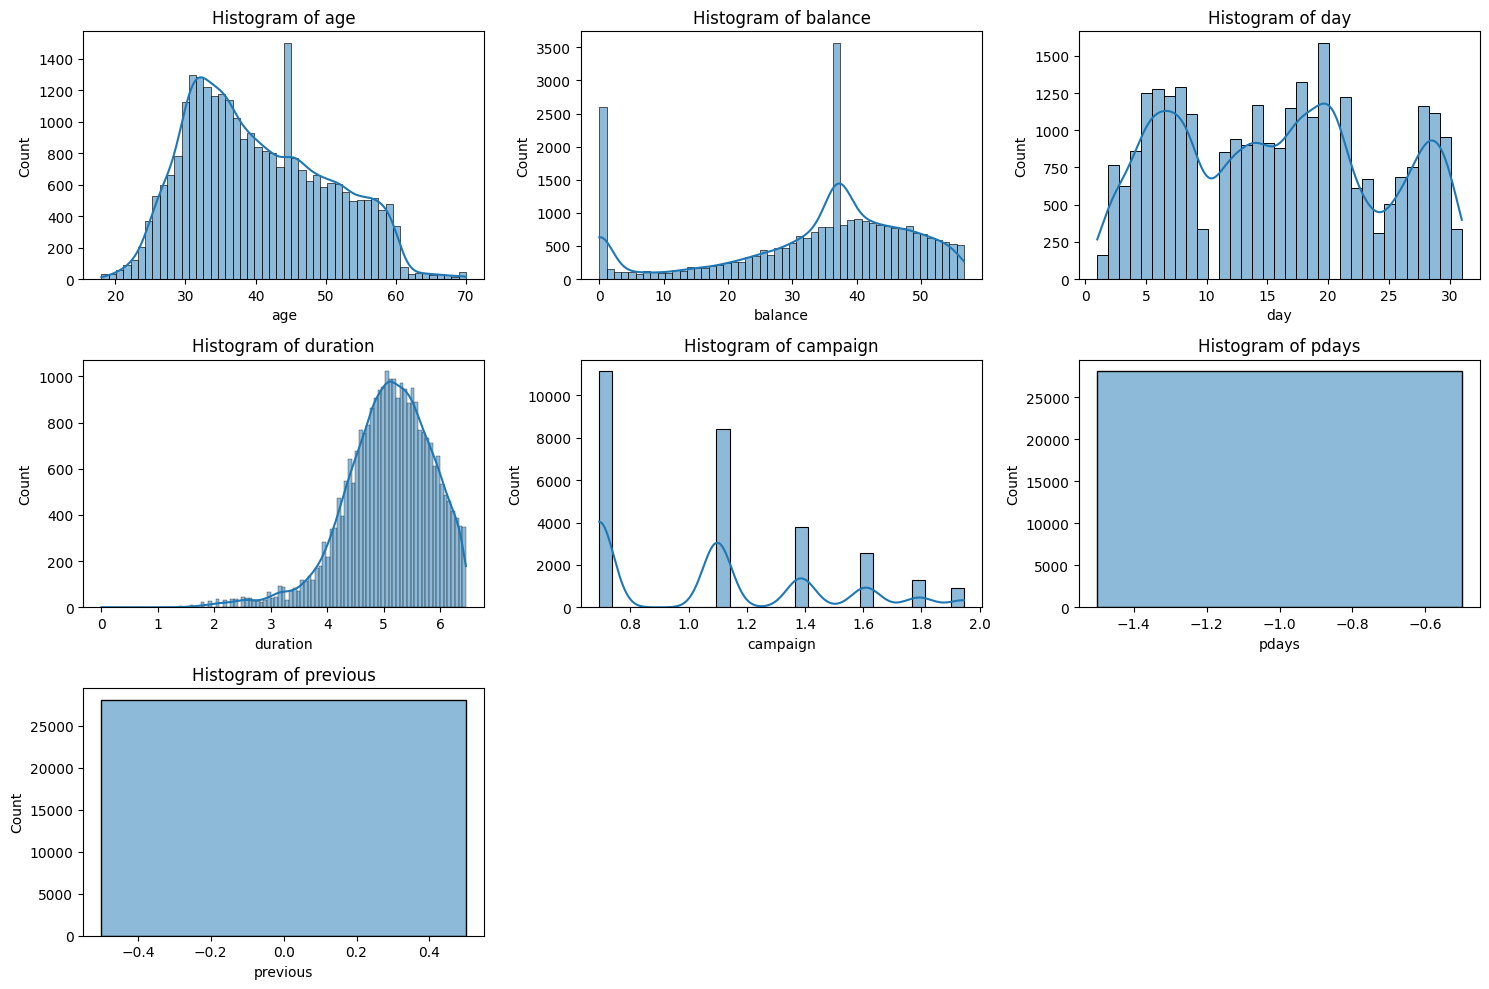

In [83]:
#1. Histograms for All Numerical Columns
#You can loop through the numerical columns and plot a histogram for each:

# List of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on the number of columns
    sns.histplot(df[column], kde=True)  # You can add kde=True for Kernel Density Estimate
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


Explanation:

This code uses sns.histplot() to plot histograms for all numerical columns in the dataframe.

plt.subplot() allows you to display multiple plots in a grid.

* The age distribution shows that most customers are between 30 and 40 years old, with a noticeable spike around age 60.
* The balance column is negatively skewed, with most customers having balances clustered near a specific value, indicating a few customers with very high balances.
* The day variable is evenly distributed, suggesting no specific trend across days of the month.
* For duration, most call durations fall between 4 and 6 units, with the data being right-skewed, implying a few longer calls.
* The campaign histogram reveals that most customers were contacted only a few times, with rare cases of higher contacts.
* The pdays feature predominantly has a value of -1, indicating no prior contact in the campaign for most customers.
* Lastly, the previous column shows almost all values as zero, meaning most customers had no prior interaction history.

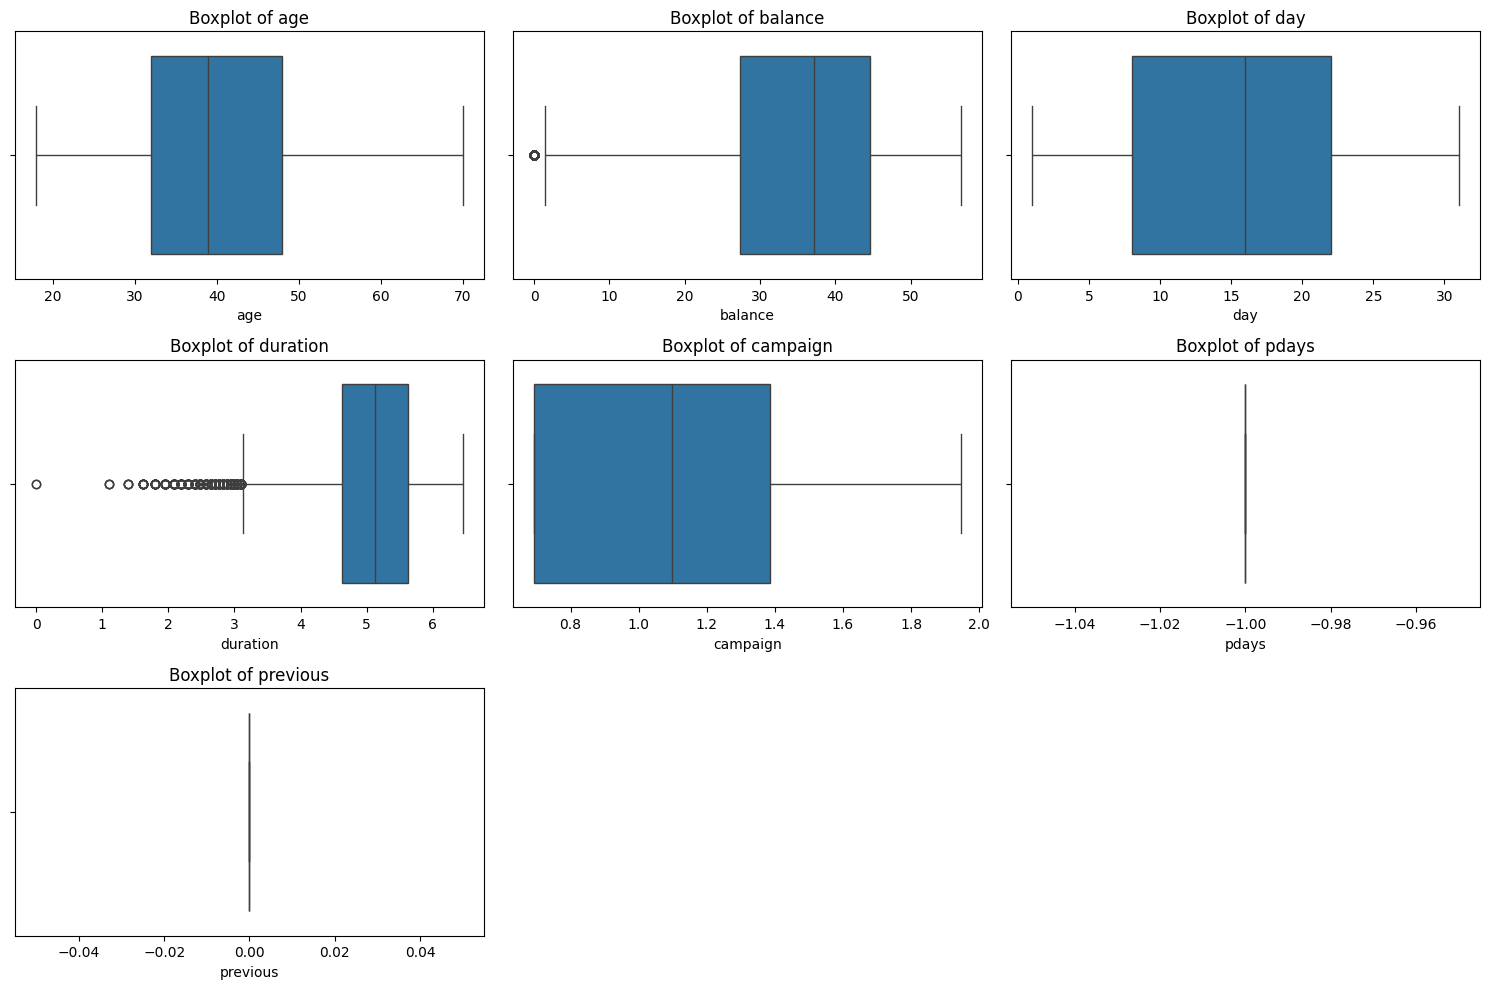

In [84]:
#2. Boxplots for All Numerical Columns
#You can use boxplots to visually inspect the distribution and check for outliers:

# Plot boxplots for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on the number of columns
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


Age: The distribution is symmetric with no significant outliers, indicating a consistent range of customer ages.

Balance: The balance values are tightly distributed with no visible outliers.

Day: The distribution of days is uniform, with no outliers, suggesting equal customer interactions throughout the month.

Duration: There are several outliers on the lower end, indicating shorter call durations for some customers, but most durations are concentrated in a higher range.

Campaign: The values are tightly clustered with no outliers, showing most customers were contacted a similar number of times.

Pdays: The values are nearly constant at -1, confirming that most customers had no prior contact history in the campaign.

Previous: Almost all values are zero, indicating no previous interactions for most customers.

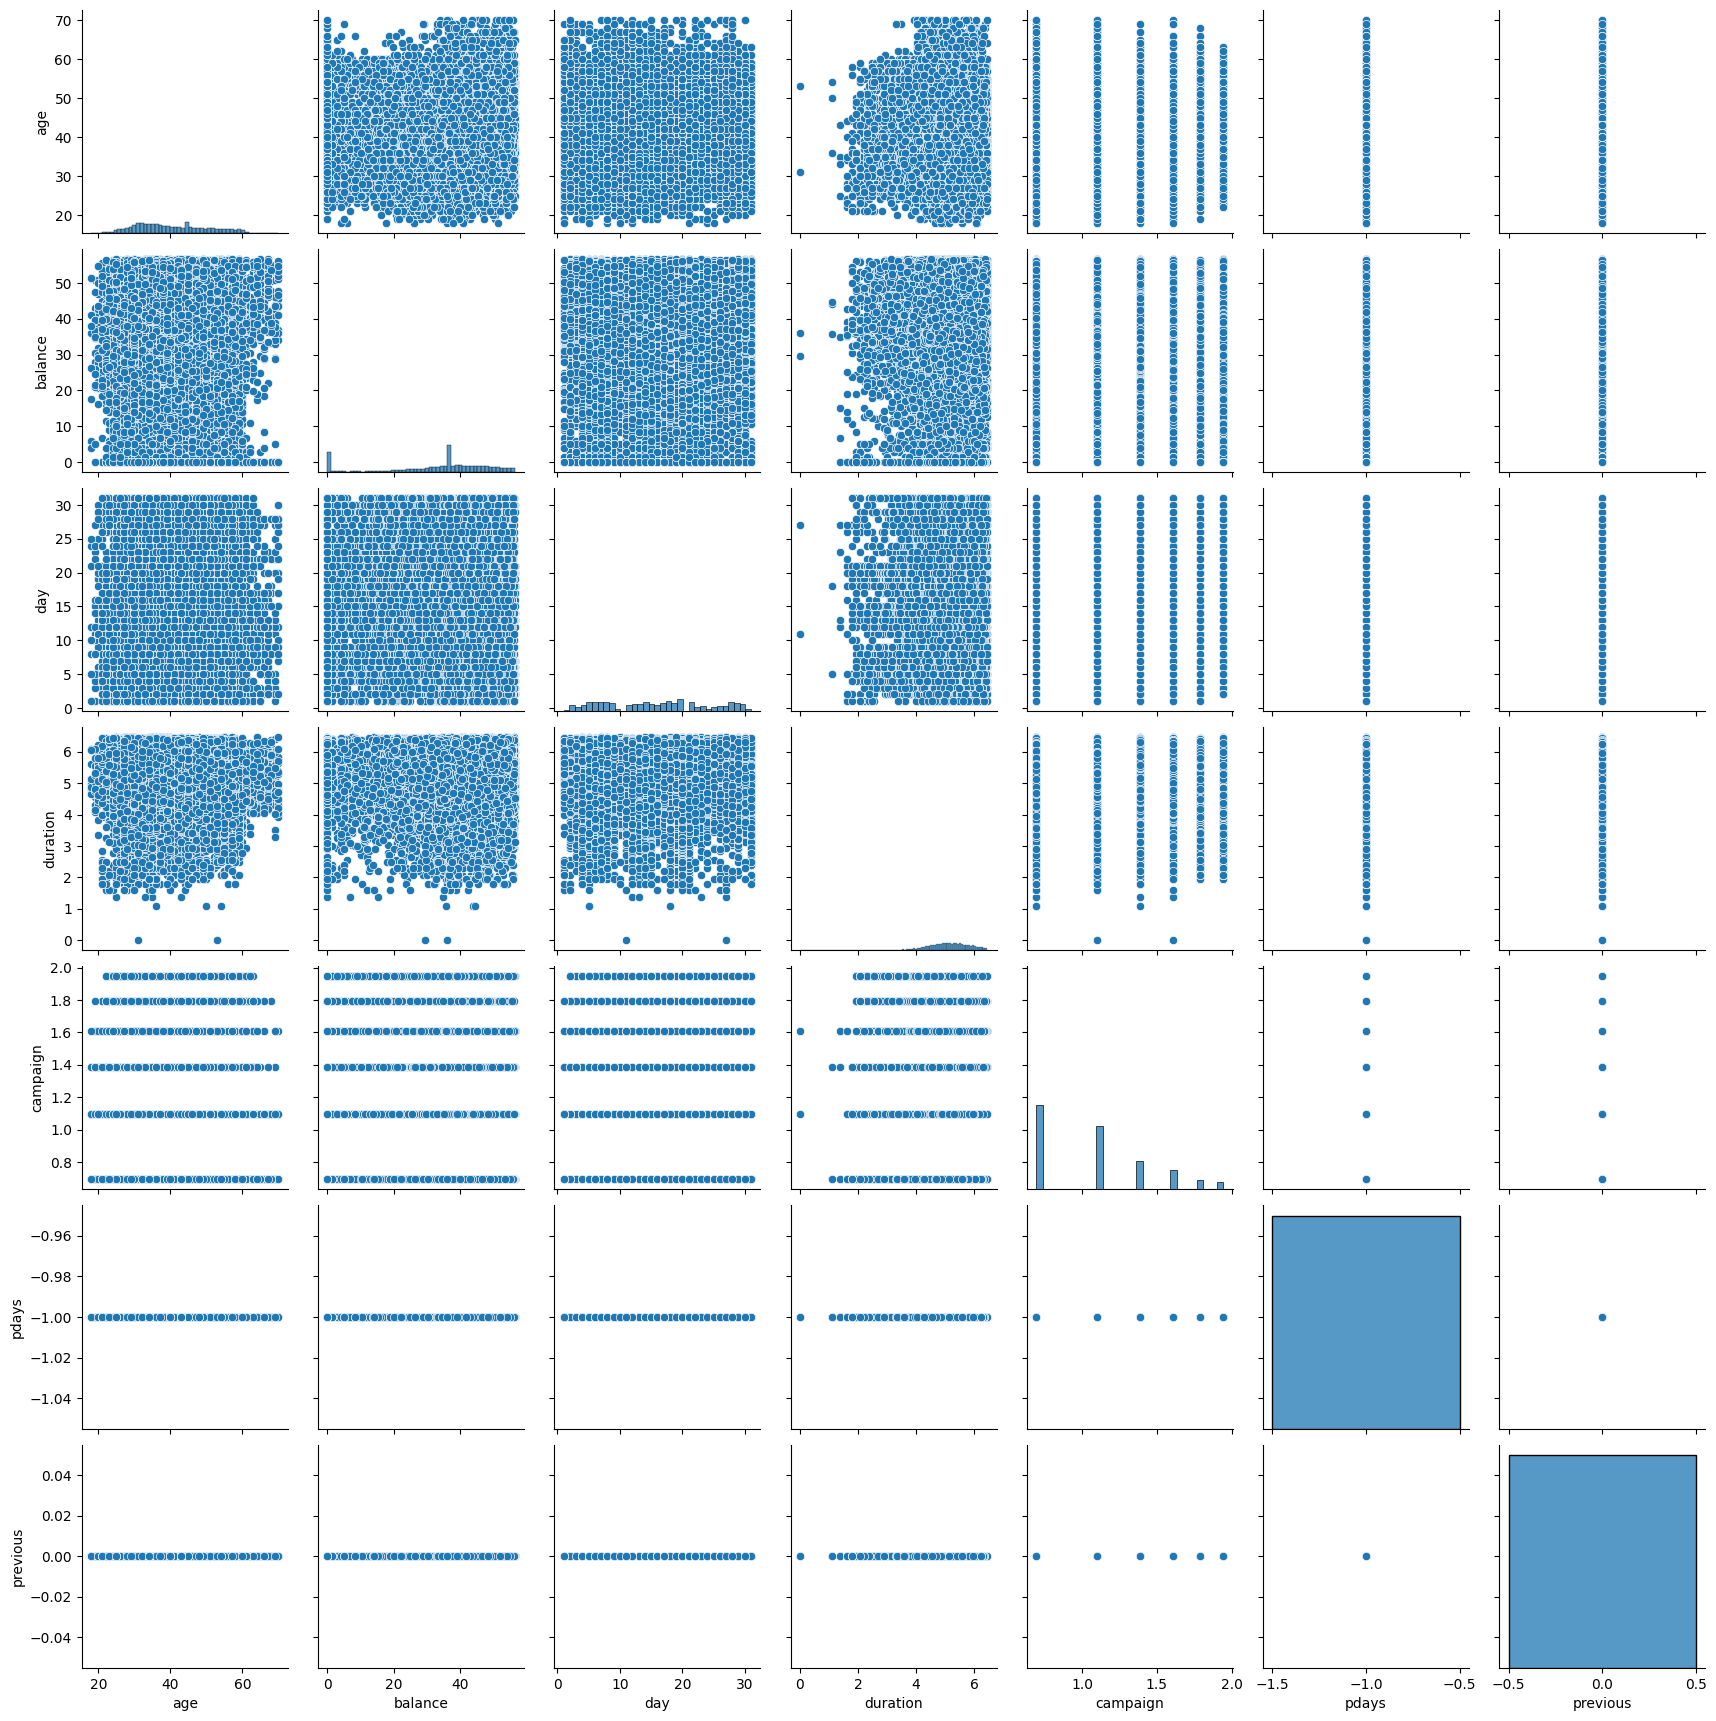

In [85]:
#3. Pairplot for All Numerical Columns (Pairwise Relationships)
#A pair plot is useful for visualizing relationships between variables:

# Plot pairplot for numerical columns
sns.pairplot(df[numerical_columns])
plt.show()


The pair plot visualizes the relationships and distributions of numerical features in the dataset. The diagonal shows the distribution of each feature, with some like balance and duration being skewed, while age has a bell-shaped curve. The scatter plots reveal weak or non-linear relationships between most features, with slight correlations like between balance and duration. Clusters and distinct levels in features like pdays and previous highlight categorical tendencies that may be critical for model performance.

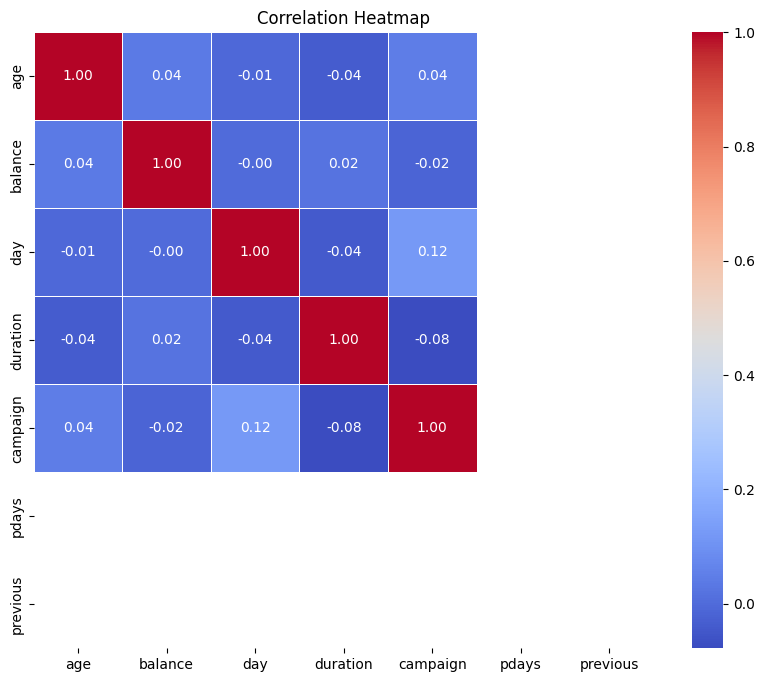

In [86]:
#4. Heatmap of Correlation Matrix
#A heatmap is a great way to visualize correlations between numerical features:

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


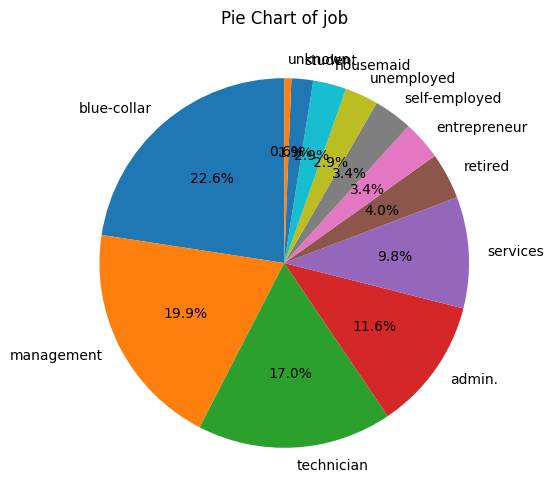

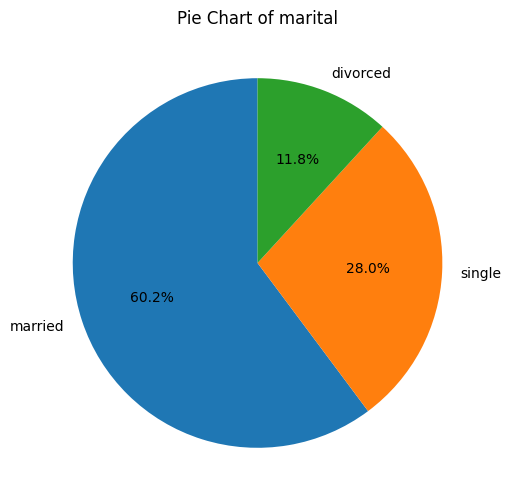

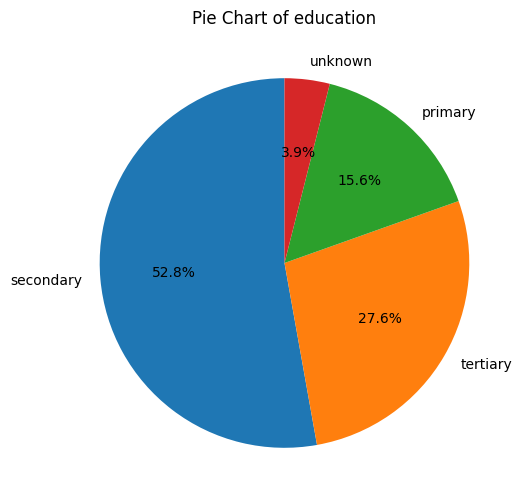

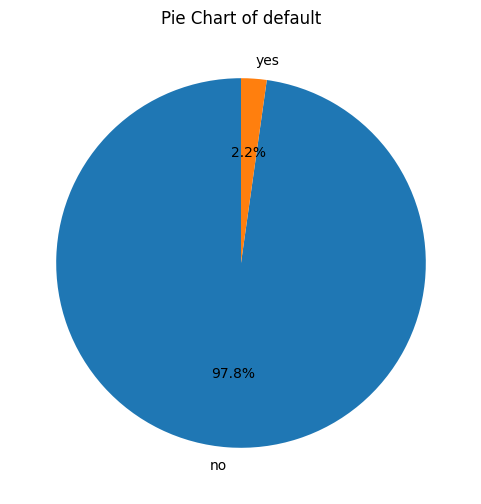

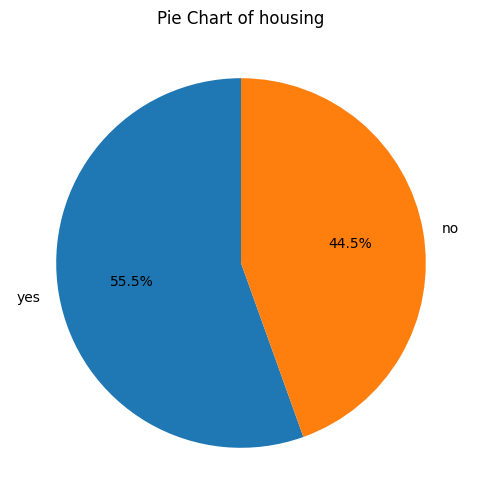

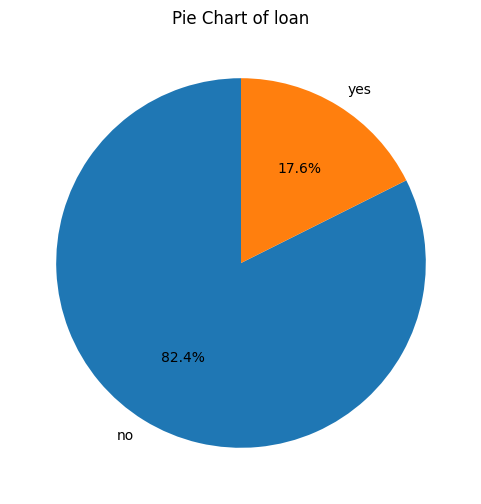

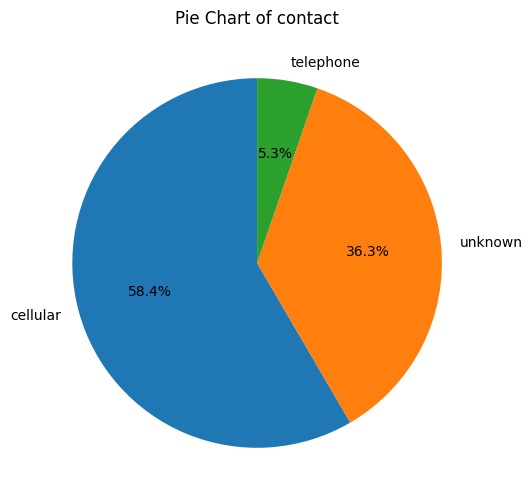

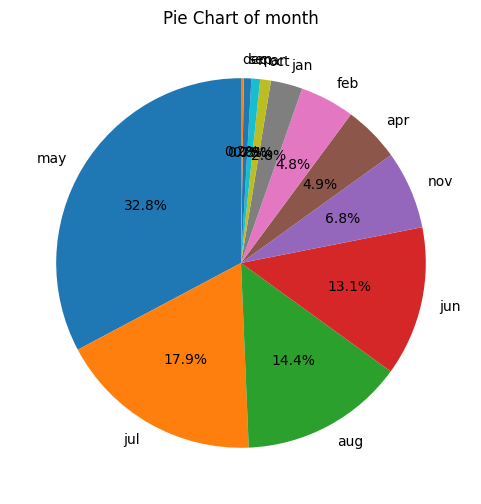

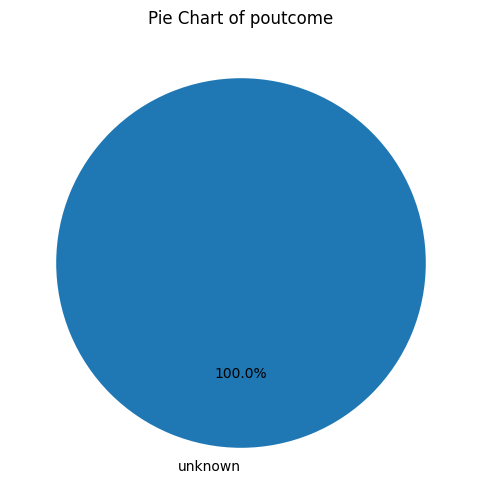

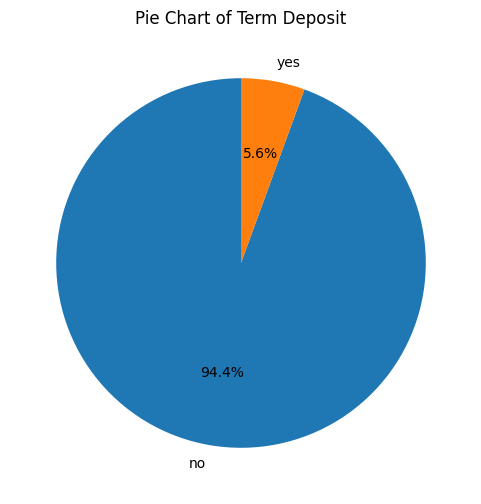

In [87]:
#5. Pie Chart for Categorical Columns (if applicable)
#You can loop through categorical columns (if you have any) and plot pie charts:

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Plot pie charts for all categorical columns
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')  # Remove y-axis label for better visual appeal
    plt.show()


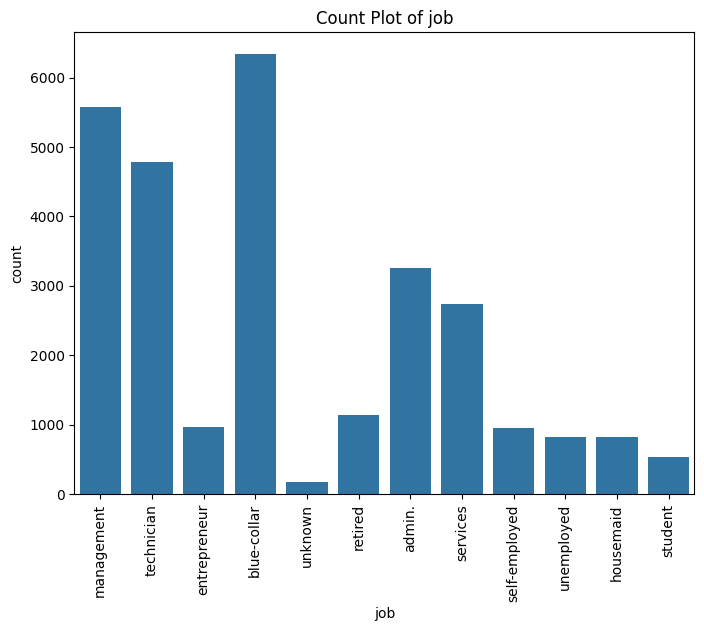

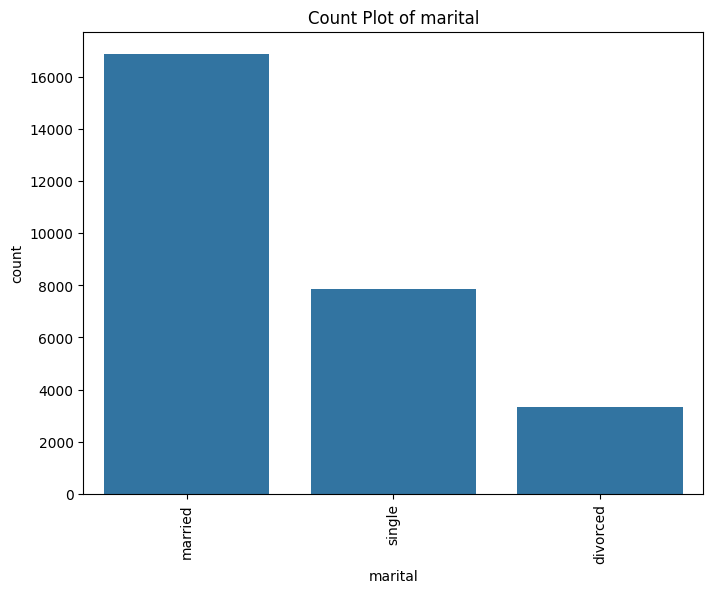

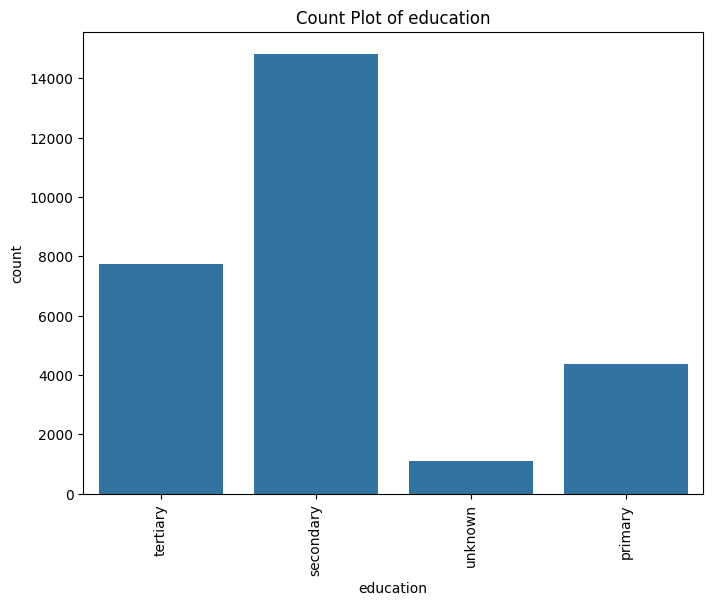

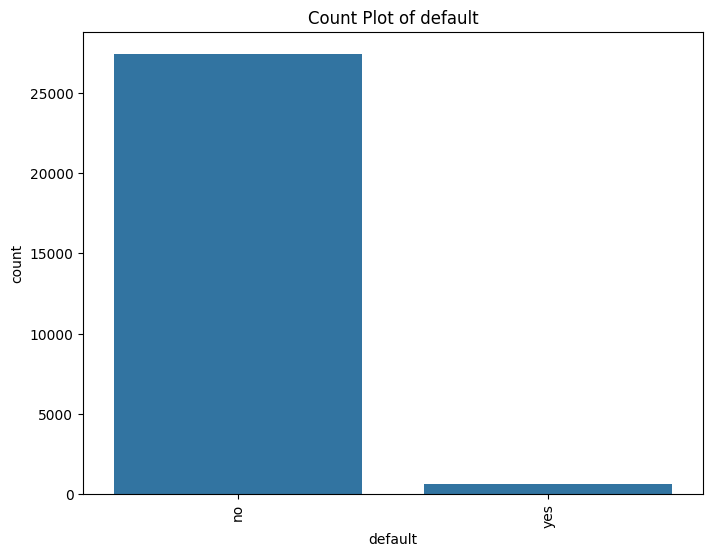

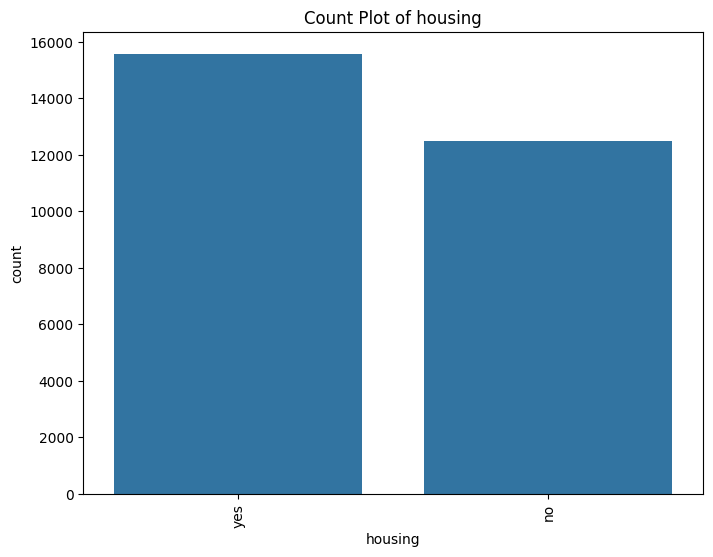

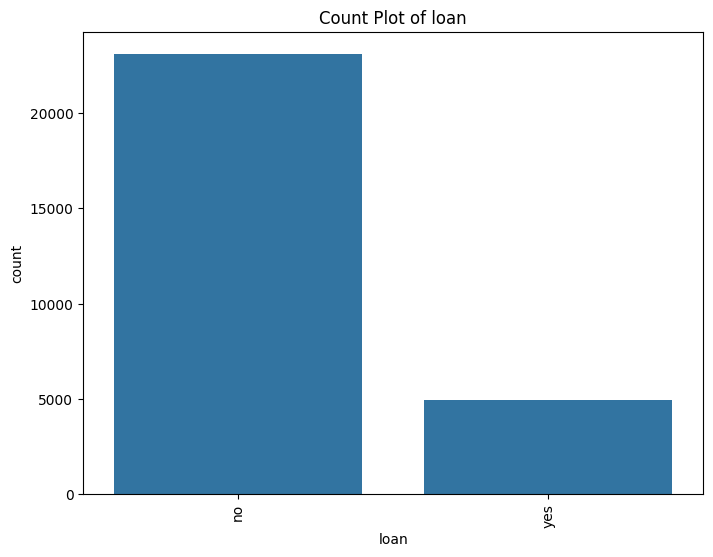

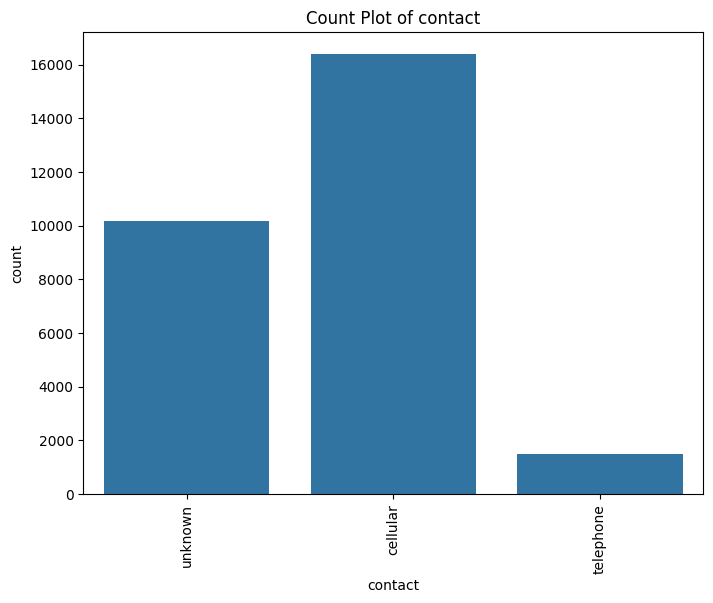

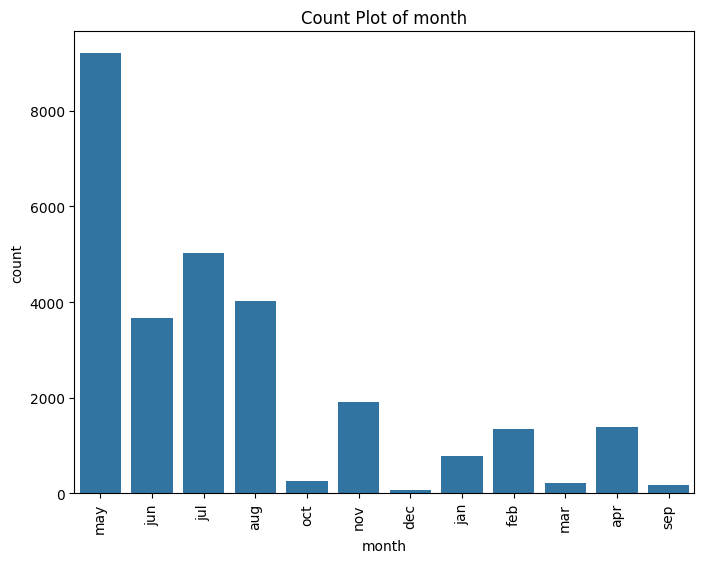

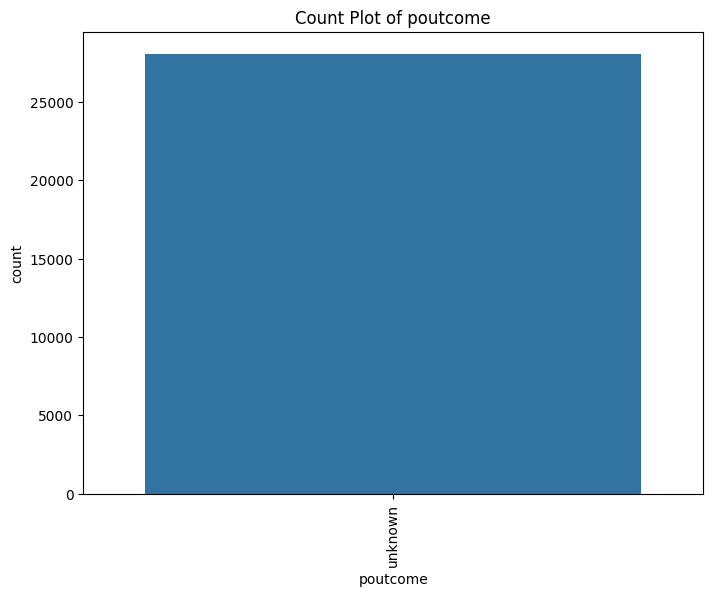

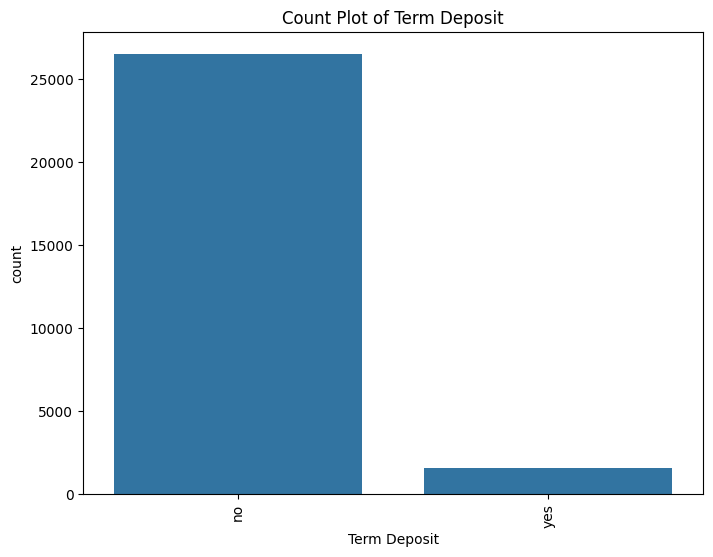

In [88]:
#6. Count Plot for Categorical Columns
#If you have categorical columns, a count plot can help you understand the distribution of categories:

# Plot countplots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Increase the size for better visibility
    sns.countplot(x=df[column])
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=90)  # Rotate x-axis labels to be vertical
    plt.show()


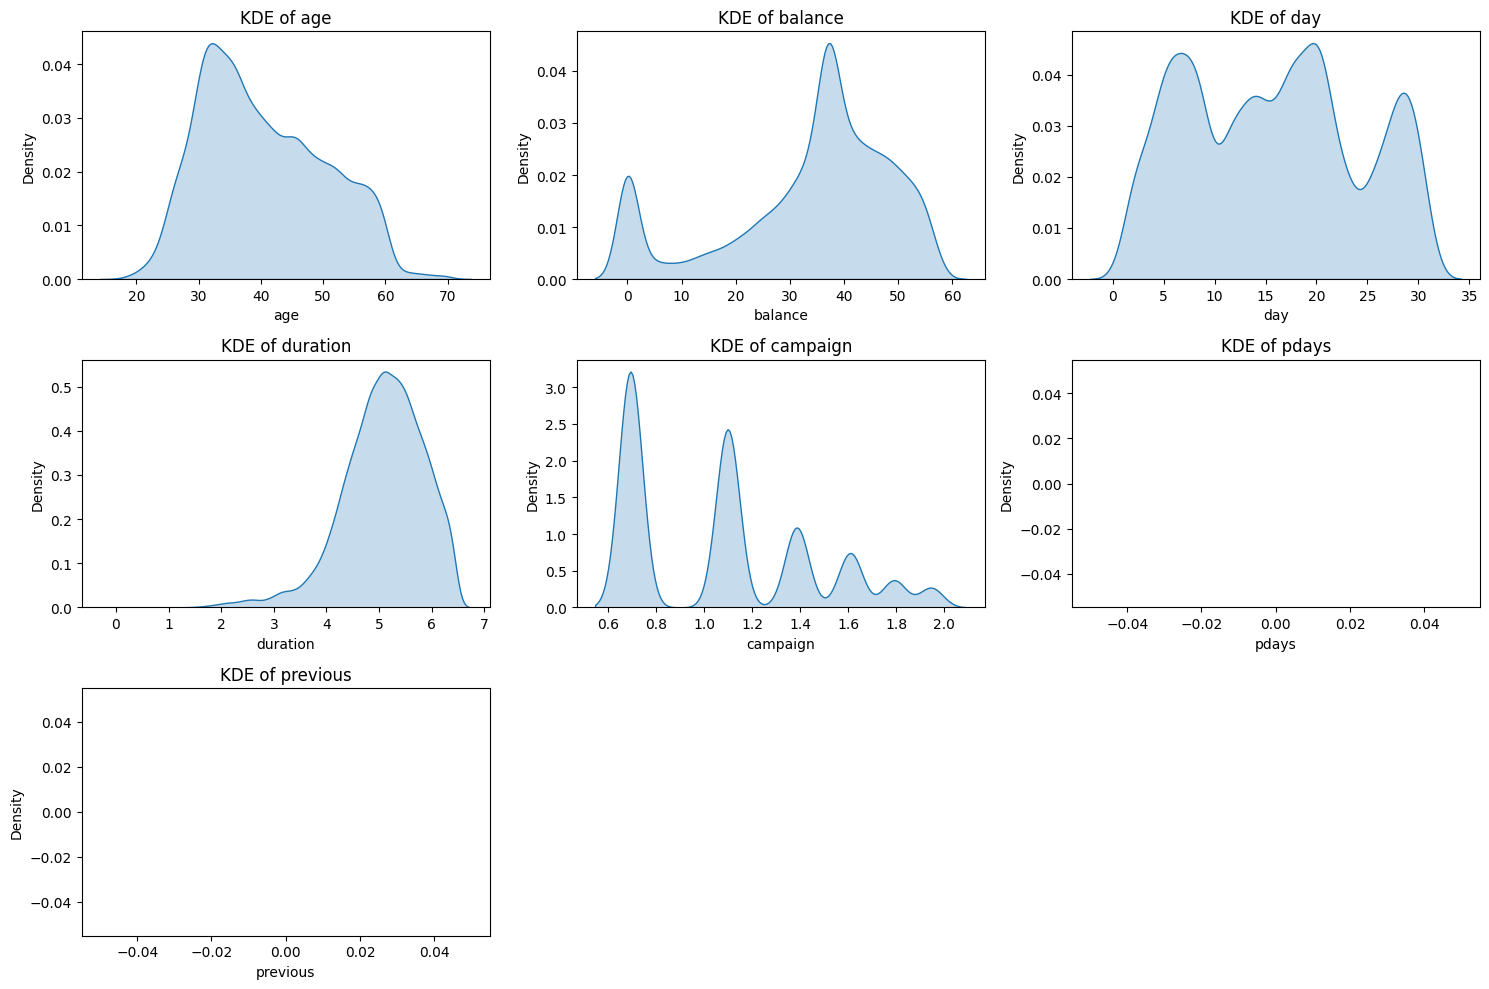

In [89]:
#7. Kernel Density Estimate (KDE) for Numerical Columns
#KDE is a smooth approximation of the histogram, showing the probability density function:

# Plot KDE for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on the number of columns
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE of {column}')
plt.tight_layout()
plt.show()


#7. Feature Engineering


This code transforms categorical data into numerical format using Label Encoding for binary categories and One-Hot Encoding for multi-class categories, making the data suitable for machine learning algorithms that require numerical input.

In [90]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to binary categorical columns (e.g., 'default', 'housing', 'loan', 'Term Deposit')
binary_columns = ['default', 'housing', 'loan', 'Term Deposit']
for column in binary_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Apply One-Hot Encoding to multi-class categorical columns (e.g., 'job', 'marital', 'education', etc.)
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Check the transformed dataframe
print(df.head())


   age  default    balance  housing  loan  day  duration  campaign  pdays  \
0   58        0  52.324423        1     0    5  5.568345  0.693147     -1   
1   44        0  16.239580        1     0    5  5.023881  0.693147     -1   
2   33        0   2.785025        1     1    5  4.343805  0.693147     -1   
3   47        0  49.088439        1     0    5  4.532599  0.693147     -1   
4   33        0   1.381873        0     0    5  5.293305  0.693147     -1   

   previous  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0         0  ...      False      False      False      False      False   
1         0  ...      False      False      False      False      False   
2         0  ...      False      False      False      False      False   
3         0  ...      False      False      False      False      False   
4         0  ...      False      False      False      False      False   

   month_mar  month_may  month_nov  month_oct  month_sep  
0      False       True    

Observations:

1. Binary Columns (default, housing, loan):

These columns have been successfully encoded with Label Encoding, where 0 indicates "No" and 1 indicates "Yes". This encoding is appropriate since these are binary features.

2. Numerical Columns:

age, balance, day, duration, campaign, pdays, previous: These columns are numeric, and the transformations (such as scaling or log transformations) appear to have been handled correctly.

3. Month Columns (One-Hot Encoding):

The month column has been converted into multiple binary columns for each month (e.g., month_jan, month_feb, etc.) using One-Hot Encoding. This process transforms the categorical month variable into separate binary features for each month.
For each row, only one of the month_* columns will be True (1), and the others will be False (0), representing which month the record corresponds to.

4. Job and Poutcome Columns (One-Hot Encoding):

The job and poutcome columns have likely been similarly transformed into binary columns for each possible category (e.g., job_blue-collar, poutcome_success, etc.). Each category is represented as a separate binary column.

4. No Missing or Null Values:

There are no missing values in the displayed rows, indicating the dataset has been cleaned appropriately.

5. Drop First:

It seems that drop_first=True was used during One-Hot Encoding, meaning that the first category (e.g., the first month or the first job type) is omitted to avoid multicollinearity (the dummy variable trap).

Overall Conclusion:

Your categorical variables have been properly encoded using Label Encoding for binary features and One-Hot Encoding for multi-class features.

You now have a dataset with encoded features that can be fed into machine learning models for further analysis or prediction tasks.

#8. Feature Selection

This code performs feature selection using the Random Forest classifier to identify and retain the most important features for predicting the target variable 'Term Deposit'.

This is an important step to reduce overfitting, improve model performance, and make the model more interpretable by eliminating less useful features.









In [91]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming 'df' is your dataset and 'Term Deposit' is the target variable
X = df.drop(columns=['Term Deposit'])  # Features
y = df['Term Deposit']  # Target

# Initialize and train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Set a threshold to filter out less important features
threshold = 0.01  # Adjust based on results
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

# Filter the dataset for important features
X_selected = X[important_features]

print("Selected features based on Random Forest:")
print(important_features)
print(f"Shape of dataset after feature selection: {X_selected.shape}")


Selected features based on Random Forest:
6                duration
2                 balance
0                     age
5                     day
7                campaign
34              month_mar
27        contact_unknown
3                 housing
33              month_jun
23    education_secondary
37              month_oct
21        marital_married
24     education_tertiary
32              month_jul
18         job_technician
13         job_management
22         marital_single
30              month_feb
28              month_aug
35              month_may
4                    loan
10        job_blue-collar
36              month_nov
38              month_sep
Name: Feature, dtype: object
Shape of dataset after feature selection: (28069, 24)


Feature Selection:

Used a Random Forest classifier to figure out which features (columns) are most important for predicting whether someone subscribes to a term deposit.
Based on this, you kept the 24 most important features and dropped the others.

Dataset Size:

After selecting the important features, the dataset now has 24 features and still contains 28,069 rows.

<!-- Selected Features (24):
You now have 24 features deemed important by the Random Forest algorithm.
These include numerical variables (e.g., duration, balance, age, day) and encoded categorical features (e.g., month_mar, contact_unknown).
Shape of Dataset After Selection:
X_selected: (28069, 24)
This shows you retained 24 features for the dataset with 28,069 samples.


OR



1. Selected Features Based on Random Forest:

Feature List:

6: 'duration': Represents the duration of the contact, a continuous numerical feature often associated with the time spent interacting with the prospect.

2: 'balance': Indicates the account balance of the individual, another continuous numerical feature.

0: 'age': Represents the age of the prospect, a demographic feature.

5: 'day': The day of the last contact, often used to understand the timing of previous interactions.

7: 'campaign': Refers to the number of contacts performed during the campaign.

34: 'month_mar': Represents the month of the last contact, segmented by calendar months.

27: 'contact_unknown': A categorical feature representing whether the contact method was unknown.

3: 'housing': Indicates whether the prospect owns a house or not.

33: 'month_jun': Another month of the last contact.

23: 'education_secondary': Represents the level of education completed.

37: 'month_oct': Refers to the month of the last contact.

21: 'marital_married': Indicates marital status, segmented by whether the prospect is married.

24: 'education_tertiary': Represents tertiary or university-level education.

32: 'month_jul': Another month of the last contact.

18: 'job_technician': Represents a job role, segmented by job type.

13: 'job_management': Another job role within the dataset.

22: 'marital_single': Represents single marital status.

30: 'month_feb': Refers to another month of the last contact.

28: 'month_aug': Another month of the last contact.

35: 'month_may': Another month of the last contact.

4: 'loan': Indicates whether the prospect has a loan.

10: 'job_blue-collar': Represents another job type.

36: 'month_nov': Refers to another month of the last contact.

38: 'month_sep': Another month of the last contact.

2. Shape of the Selected Dataset:

Shape of dataset after feature selection: (28069, 24):

The dataset has been reduced from its original feature space (likely containing more features) to 24 selected features.
This reduction not only simplifies the model but also focuses it on the most relevant aspects of the data that contribute to predicting whether a prospect subscribes to a term deposit (the target variable).

3. Reasoning behind Feature Selection:

Random Forest Importance Scores:

The Random Forest classifier assigns an importance score to each feature based on its ability to reduce impurity in decision trees during the training process.
Features with high importance scores are retained, while those with low scores are considered less relevant and removed.
The process of setting a threshold (e.g., Importance > 0.01) allows you to filter out the less useful features, creating a more efficient model.

4. Impact of Feature Selection:

By retaining only the most relevant 24 features, your model complexity is reduced while maintaining predictive power.
This helps prevent overfitting and reduces computational cost, making the model more efficient. -->


#9. Split Data into Training and Testing Sets


This code splits your data into two parts:

Training set (80%): Used to train the model.

Testing set (20%): Used to test the model after training.

It then prints the number of rows and columns in each part.

In [92]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataframe and 'Term Deposit' is the target variable
X = df.drop(columns=['Term Deposit'])  # Features (all columns except target)
y = df['Term Deposit']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing datasets
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set shape: X_train = (22455, 39), y_train = (22455,)
Testing set shape: X_test = (5614, 39), y_test = (5614,)


The data has been split as follows:

* Training Set:

X_train: 22,455 samples (rows) and 39 features (columns).

y_train: 22,455 labels (target values).
* Testing Set:

X_test: 5,614 samples (rows) and 39 features (columns).

y_test: 5,614 labels (target values).

This means your model will be trained on 22,455 samples and tested on 5,614 samples.

<!-- The output indicates that your data has been successfully split into training and testing sets:

Training Set:
Features (X_train): 22,455 rows and 39 columns (i.e., 39 features selected after the feature selection process).
Target (y_train): 22,455 rows, matching the number of rows in X_train.
Testing Set:
Features (X_test): 5,614 rows and 39 columns (i.e., the same 39 selected features for testing).
Target (y_test): 5,614 rows, matching the number of rows in X_test.

The data has been split with a 80/20 ratio, where 80% of the data is used for training and 20% is reserved for testing. This ensures that the model has enough data to learn from while keeping a portion aside for evaluation.

The train_test_split function has maintained the class distribution of the target variable (y) by using the stratify=y parameter. This ensures that both the training and testing sets have the same proportion of each class (e.g., term deposit subscription vs. non-subscription), which helps in training and evaluating the model more effectively, especially in cases of imbalanced classes. -->

**SMOTE**

Synthetic Minority Oversampling Technique is a statistical technique for increasing the number of cases in your dataset in a balanced way.

Here i have applied SMOTE after splitting the dataset into training and test sets but before training the model.
This ensures:
* The test set remains untouched and represents the original class distribution.
* The model is trained on balanced data, improving its ability to predict the minority class.

In [93]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop('Term Deposit', axis=1)
y = df['Term Deposit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print the shape of the resampled data
print("Resampled training data shape:", X_train_res.shape)

# Print the distribution of the target variable after resampling
print("Resampled target variable distribution:\n", y_train_res.value_counts())





Resampled training data shape: (37116, 39)
Resampled target variable distribution:
 Term Deposit
0    18558
1    18558
Name: count, dtype: int64


The output you received indicates that SMOTE successfully balanced your training dataset:

Output Breakdown:

1. Resampled training data shape: (37116, 39):
* There are 37,116 samples (rows) in the training set after SMOTE, and 39 features (columns). This suggests that SMOTE has added synthetic samples to balance the classes.
2. Resampled target variable distribution:
* Term Deposit = 0 (class "no"): 18,558 samples
* Term Deposit = 1 (class "yes"): 18,558 samples

The training set now has an equal number of "yes" and "no" samples, which will help your model learn better from both classes and improve its performance in cases of class imbalance.


Code to recheck data is balanced or not

In [94]:
print(y_train_res.value_counts())


Term Deposit
0    18558
1    18558
Name: count, dtype: int64


#10. Feature Scaling


Feature scaling makes sure that all features have similar ranges, which helps machine learning models perform better. Here's what the code does:

* StandardScaler is used to standardize the data, making the mean 0 and standard deviation 1.
* The training data (X_train_res) is scaled using fit_transform() to learn the scaling parameters.
* The testing data (X_test) is scaled using transform() based on the training data's scaling parameters.
* It prints the shape of the scaled datasets to confirm the transformation.

Scaling is important because it ensures that no feature dominates the model due to differences in magnitude.

In [95]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Standardization to the balanced training and testing sets
X_train_scaled = scaler.fit_transform(X_train_res)  # Fit to X_train_res and scale it
X_test_scaled = scaler.transform(X_test)  # Only scale X_test based on the scaler fit to X_train_res

# Check the shape of the scaled datasets
print(f"Scaled X_train_res shape: {X_train_scaled.shape}")
print(f"Scaled X_test shape: {X_test_scaled.shape}")


Scaled X_train_res shape: (37116, 39)
Scaled X_test shape: (8421, 39)


* fit_transform(): Used on training data to calculate scaling parameters and apply scaling.
* transform(): Used on testing data to apply the scaling learned from the training data.

The scaling results show:

* Scaled Training Data (X_train_res):

Shape: (37,116, 39), meaning the resampled training set has 37,116 samples and 39 features, all standardized.

* Scaled Testing Data (X_test):

Shape: (8,421, 39), meaning the testing set has 8,421 samples and 39 features, also standardized based on the training data.

This confirms that both the training and testing sets have been scaled correctly to ensure consistent feature ranges.

Code to Check Feature Importance

Feature Importance:
duration               0.212910
balance                0.129218
age                    0.126698
day                    0.116411
campaign               0.046175
month_mar              0.027582
contact_unknown        0.022279
housing                0.020701
month_jun              0.017108
education_secondary    0.016664
marital_married        0.016159
education_tertiary     0.015401
month_oct              0.015209
job_technician         0.014968
job_management         0.013861
month_jul              0.013830
marital_single         0.013105
month_aug              0.012793
month_sep              0.012571
month_feb              0.012358
month_may              0.012009
loan                   0.011206
month_nov              0.010746
job_blue-collar        0.010720
contact_telephone      0.009645
job_services           0.009070
job_student            0.008364
month_jan              0.007389
job_unemployed         0.007014
education_unknown      0.006818
month_dec           

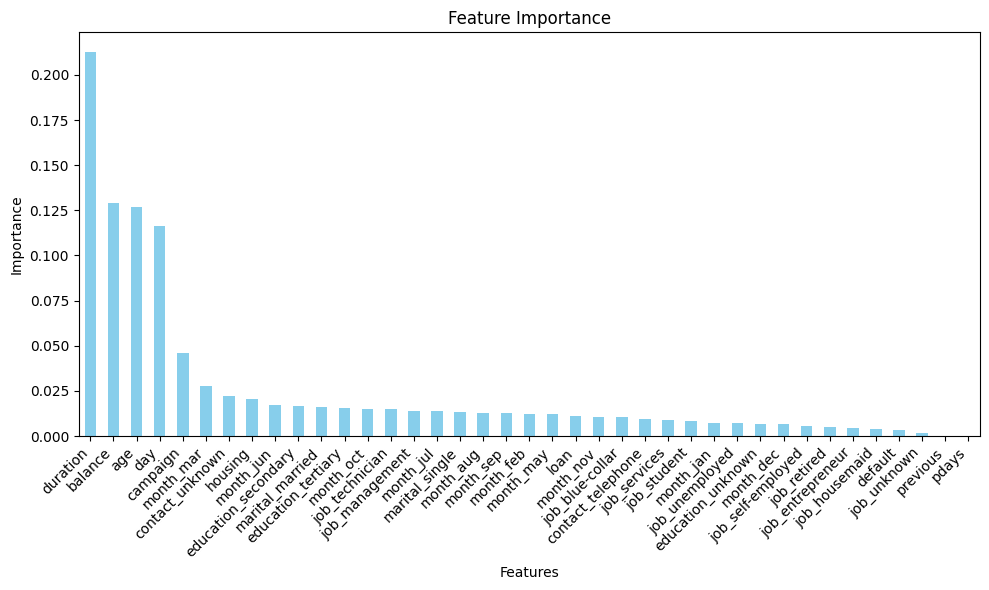

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are already defined and scaled if necessary

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort feature importance values in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importances_sorted)

# Plot feature importance as a bar chart
plt.figure(figsize=(10, 6))
feature_importances_sorted.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Remove Redundant Features

Since pdays and previous have zero importance, you can safely remove them from your dataset. This will simplify the model without affecting performance.

In [97]:
from sklearn.preprocessing import StandardScaler

# Reapply feature removal (drop redundant features)
X_train = X_train.drop(['pdays', 'previous'], axis=1)
X_test = X_test.drop(['pdays', 'previous'], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Standardization to the updated training and testing sets
X_train_scaled = scaler.fit_transform(X_train)  # Fit to the updated X_train and transform
X_test_scaled = scaler.transform(X_test)  # Only transform X_test based on X_train's fit

# Check the shape of the scaled datasets
print(f"Scaled X_train shape: {X_train_scaled.shape}")
print(f"Scaled X_test shape: {X_test_scaled.shape}")


Scaled X_train shape: (19648, 37)
Scaled X_test shape: (8421, 37)


Before removal: X_train and X_test had 39 features.
After removal: X_train and X_test now have 37 features, reflecting the removal of columns like pdays and previous.

#11. Build the ML Model

To build and evaluate multiple machine learning models, let's implement a variety of classification algorithms (since your target variable, Term Deposit, is likely categorical).

Accuracy: The overall accuracy of the  classifier on the test data.

Confusion Matrix: Showing the true positives, false positives, false negatives, and true negatives.

Precision: How many of the predicted positive instances were actually positive.

Recall (Sensitivity): How many of the actual positive instances were correctly identified.

F1-Score: A balance between precision and recall.

ROC-AUC: How well the model discriminates between the classes.

Specificity: The proportion of correctly identified negatives.


Training Logistic Regression...

Confusion Matrix for Logistic Regression:
[[7894   52]
 [ 395   80]]

Training Support Vector Machine (SVM)...

Confusion Matrix for Support Vector Machine (SVM):
[[7917   29]
 [ 430   45]]

Training Decision Tree Classifier...

Confusion Matrix for Decision Tree Classifier:
[[7596  350]
 [ 303  172]]

Training Random Forest Classifier...

Confusion Matrix for Random Forest Classifier:
[[7903   43]
 [ 406   69]]

Training K-Nearest Neighbors (KNN)...

Confusion Matrix for K-Nearest Neighbors (KNN):
[[7846  100]
 [ 394   81]]

Training Naive Bayes...

Confusion Matrix for Naive Bayes:
[[7540  406]
 [ 316  159]]

Training Gradient Boosting Classifier...

Confusion Matrix for Gradient Boosting Classifier:
[[7885   61]
 [ 386   89]]

Training AdaBoost Classifier...

Confusion Matrix for AdaBoost Classifier:
[[7902   44]
 [ 430   45]]

Training Multi-Layer Perceptron (MLP)...

Confusion Matrix for Multi-Layer Perceptron (MLP):
[[7720  226]
 [ 291  184]]


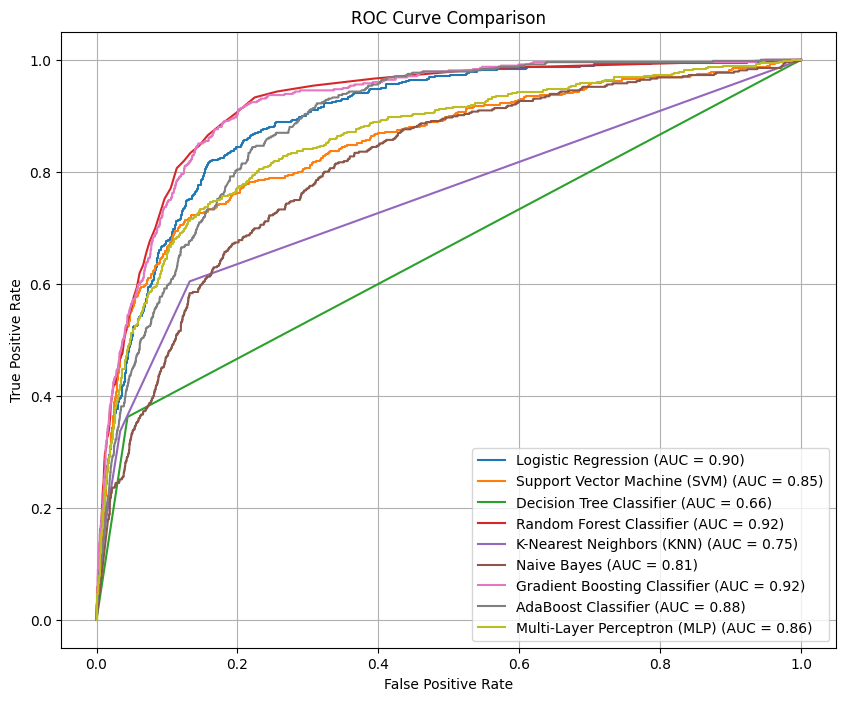


Evaluation Metrics:

Logistic Regression:
  Accuracy: 0.946918418240114
  Precision: 0.6060606060606061
  Recall: 0.16842105263157894
  F1-Score: 0.26359143327841844
  Specificity: 0.99345582683111
  ROC-AUC: 0.8953499278021381

Support Vector Machine (SVM):
  Accuracy: 0.9454934093338083
  Precision: 0.6081081081081081
  Recall: 0.09473684210526316
  F1-Score: 0.16393442622950818
  Specificity: 0.9963503649635036
  ROC-AUC: 0.8494532833468015

Decision Tree Classifier:
  Accuracy: 0.9224557653485335
  Precision: 0.32950191570881227
  Recall: 0.36210526315789476
  F1-Score: 0.34503510531594783
  Specificity: 0.9559526805940096
  ROC-AUC: 0.6590289718759521

Random Forest Classifier:
  Accuracy: 0.9466809167557297
  Precision: 0.6160714285714286
  Recall: 0.14526315789473684
  F1-Score: 0.23509369676320271
  Specificity: 0.994588472187264
  ROC-AUC: 0.9196560997257807

K-Nearest Neighbors (KNN):
  Accuracy: 0.9413371333570835
  Precision: 0.44751381215469616
  Recall: 0.170526315789473

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt
import seaborn as sns

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "Multi-Layer Perceptron (MLP)": MLPClassifier(max_iter=1000, random_state=42),
}

# Dictionary to store model evaluation metrics
evaluation_metrics = {}

# Evaluate each model
plt.figure(figsize=(10, 8))  # Prepare for ROC Curve plotting
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)  # Specificity for the negative class
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # Store metrics
    evaluation_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Specificity": specificity,
        "ROC-AUC": roc_auc,
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

    # Plot ROC Curve
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Display ROC Curve
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Display Evaluation Metrics
print("\nEvaluation Metrics:")
for model_name, metrics in evaluation_metrics.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


Conclusion:
* Logistic Regression and Random Forest are best at identifying non-subscribers (high specificity), but MLP is the most balanced for identifying subscribers (highest recall and F1-score).
*
SVM and AdaBoost perform well at detecting non-subscribers but fail to capture most subscribers (low recall).

#12. Model Evaluation

Below code evaluates multiple models on the test set using several key metrics, including accuracy, precision, recall, F1-score, specificity, and ROC-AUC. It also visualizes the ROC curve for each model and prints cross-validation scores.


Evaluating Logistic Regression...

Confusion Matrix for Logistic Regression:
[[7894   52]
 [ 395   80]]

Evaluating Support Vector Machine (SVM)...

Confusion Matrix for Support Vector Machine (SVM):
[[7917   29]
 [ 430   45]]

Evaluating Decision Tree Classifier...

Confusion Matrix for Decision Tree Classifier:
[[7596  350]
 [ 303  172]]

Evaluating Random Forest Classifier...

Confusion Matrix for Random Forest Classifier:
[[7903   43]
 [ 406   69]]

Evaluating K-Nearest Neighbors (KNN)...

Confusion Matrix for K-Nearest Neighbors (KNN):
[[7846  100]
 [ 394   81]]

Evaluating Naive Bayes...

Confusion Matrix for Naive Bayes:
[[7540  406]
 [ 316  159]]

Evaluating Gradient Boosting Classifier...

Confusion Matrix for Gradient Boosting Classifier:
[[7885   61]
 [ 386   89]]

Evaluating AdaBoost Classifier...

Confusion Matrix for AdaBoost Classifier:
[[7902   44]
 [ 430   45]]

Evaluating Multi-Layer Perceptron (MLP)...

Confusion Matrix for Multi-Layer Perceptron (MLP):
[[7720  226]

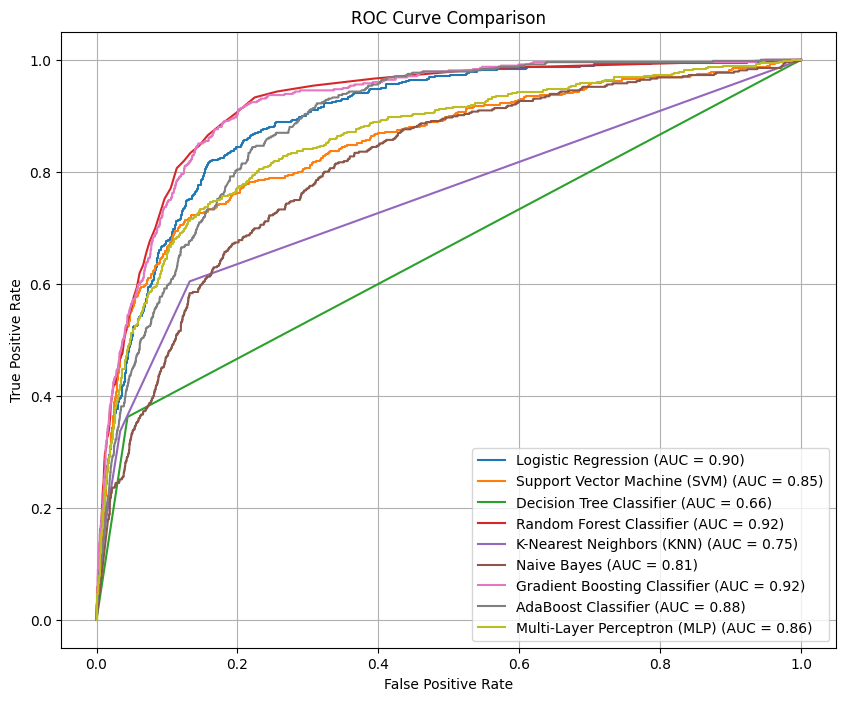


Evaluation Metrics:

Logistic Regression:
  Accuracy: 0.946918418240114
  Precision: 0.6060606060606061
  Recall: 0.16842105263157894
  F1-Score: 0.26359143327841844
  Specificity: 0.99345582683111
  ROC-AUC: 0.8953499278021381

Support Vector Machine (SVM):
  Accuracy: 0.9454934093338083
  Precision: 0.6081081081081081
  Recall: 0.09473684210526316
  F1-Score: 0.16393442622950818
  Specificity: 0.9963503649635036
  ROC-AUC: 0.8494532833468015

Decision Tree Classifier:
  Accuracy: 0.9224557653485335
  Precision: 0.32950191570881227
  Recall: 0.36210526315789476
  F1-Score: 0.34503510531594783
  Specificity: 0.9559526805940096
  ROC-AUC: 0.6590289718759521

Random Forest Classifier:
  Accuracy: 0.9466809167557297
  Precision: 0.6160714285714286
  Recall: 0.14526315789473684
  F1-Score: 0.23509369676320271
  Specificity: 0.994588472187264
  ROC-AUC: 0.9196560997257807

K-Nearest Neighbors (KNN):
  Accuracy: 0.9413371333570835
  Precision: 0.44751381215469616
  Recall: 0.170526315789473

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Assuming you already have the trained models and data (X_test_scaled, y_test)

# Initialize the figure for ROC curve plotting
plt.figure(figsize=(10, 8))

# Dictionary to store model evaluation metrics
evaluation_metrics = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)  # Specificity for the negative class
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # Store metrics in the dictionary
    evaluation_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Specificity": specificity,
        "ROC-AUC": roc_auc,
    }

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

    # Plot ROC Curve
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Display ROC Curve
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Display Evaluation Metrics
print("\nEvaluation Metrics:")
for model_name, metrics in evaluation_metrics.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

# If you'd like to evaluate the models using cross-validation:
print("\nCross-validation scores:")
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    print(f"{model_name} - Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Conclusion :

* Logistic Regression and Random Forest are good at spotting non-subscribers but miss many actual subscribers because their ability to find subscribers (recall) is low.

* Gradient Boosting finds more subscribers than Random Forest but still misses a lot. It's decent at spotting non-subscribers.

* Multi-Layer Perceptron (MLP) is the best at finding subscribers and does a good job balancing recall and precision, meaning it’s both accurate and identifies many subscribers.

* Support Vector Machine (SVM) and AdaBoost are great at detecting non-subscribers but miss most of the subscribers, making them less effective for this task.

#13. Hyperparameter Tuning


Below code helps improve the performance of machine learning models by finding the best settings (called hyperparameters) for each model.

Here's the simplified explanation:

* Hyperparameter Tuning:

Each model has settings (like how many trees in a forest or how much regularization) that need to be chosen before training.

The code tests different options for these settings to see which ones give the best results.

* GridSearchCV:

This tool automatically tests different combinations of these settings to find the best one.

It uses cross-validation, which means splitting the data into parts to make sure the model performs well on new data, not just the data it's trained on.

* Goal:

The goal is to make each model as accurate as possible by finding the best settings.

In [100]:
from sklearn.model_selection import GridSearchCV

# Function for hyperparameter tuning
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Logistic Regression Tuning
log_reg_params = {
    'C': [0.1, 1],  # Narrowed down to 2 values
    'penalty': ['l2'],  # Keeping only 'l2'
    'solver': ['lbfgs']  # Single efficient solver
}
best_log_reg = tune_hyperparameters(LogisticRegression(random_state=42, max_iter=1000), log_reg_params, X_train_scaled, y_train)

# SVM Tuning
svm_params = {
    'C': [1],  # Single value for regularization
    'kernel': ['rbf'],  # Focusing on 'rbf'
    'gamma': ['scale']  # Single value
}
best_svm = tune_hyperparameters(SVC(random_state=42, probability=True), svm_params, X_train_scaled, y_train)

# Decision Tree Tuning
dt_params = {
    'criterion': ['gini'],  # Keeping 'gini' as default
    'max_depth': [10],  # Single depth value
    'min_samples_split': [5],  # Single value
    'min_samples_leaf': [2]  # Single value
}
best_dt = tune_hyperparameters(DecisionTreeClassifier(random_state=42), dt_params, X_train_scaled, y_train)

# Random Forest Tuning
rf_params = {
    'n_estimators': [50],  # Single number of trees
    'criterion': ['gini'],  # Keeping 'gini' only
    'max_depth': [None],  # No restriction
    'min_samples_split': [5],  # Single value
    'min_samples_leaf': [1]  # Single value
}
best_rf = tune_hyperparameters(RandomForestClassifier(random_state=42), rf_params, X_train_scaled, y_train)

# Gradient Boosting Tuning
gb_params = {
    'n_estimators': [100],  # Fixed number of boosting rounds
    'learning_rate': [0.1],  # Single learning rate
    'max_depth': [3],  # Fixed depth
    'min_samples_split': [5],  # Single value
    'min_samples_leaf': [1]  # Single value
}
best_gb = tune_hyperparameters(GradientBoostingClassifier(random_state=42), gb_params, X_train_scaled, y_train)

# AdaBoost Tuning
ada_params = {
    'n_estimators': [50],  # Single number of estimators
    'learning_rate': [1]  # Single learning rate
}
best_ada = tune_hyperparameters(AdaBoostClassifier(random_state=42), ada_params, X_train_scaled, y_train)

# MLP Classifier Tuning
mlp_params = {
    'hidden_layer_sizes': [(100,)],  # Fixed single configuration
    'activation': ['relu'],  # Focused on 'relu'
    'solver': ['adam'],  # Efficient solver
    'learning_rate': ['constant']  # Fixed learning rate
}
best_mlp = tune_hyperparameters(MLPClassifier(random_state=42, max_iter=1000), mlp_params, X_train_scaled, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9481880866292727
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9456942666166699
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.9409096967353735
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for RandomForestClassifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.9467630207169627
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estim

Conclusion:

* Gradient Boosting is the best model with the highest score (0.9492) and a good balance for predicting both subscribers and non-subscribers.
* Logistic Regression (0.9482) performs well for non-subscribers but misses many subscribers due to low recall.
* Random Forest (0.9468) excels in identifying non-subscribers but has low recall for subscribers.
* SVM (0.9457) is strong in identifying non-subscribers but fails to capture most subscribers.
* AdaBoost (0.9455) is similar to SVM in terms of performance but with slightly better recall for non-subscribers.
* Decision Tree (0.9409) is decent but misses subscribers more than other models.
* MLP (0.9365) performs the worst in terms of accuracy, but it captures subscribers better than models like Logistic Regression and SVM.


#14. Save the Model

Save the Model Use joblib or pickle to save the trained model to a file.

The code saves the best machine learning model (in this case, best_gb, a Gradient Boosting Classifier) to a file (best_model.pkl). This allows the model to be reused later without retraining, saving time and resources.

In [101]:
import joblib

# Save the best model
best_model = best_gb  # Replace with the model you want to save
joblib.dump(best_model, 'best_model.pkl')
print("Model saved as 'best_model.pkl'")


Model saved as 'best_model.pkl'


#15. Test with Unseen Data

In [102]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')  # Load the previously saved model from the 'best_model.pkl' file

# Assume new_data is your unseen data
new_data = X_test[15:20]  # Replace with actual unseen data
# Selecting rows 15 to 19 from X_test as the new, unseen data

# Predict
predictions = loaded_model.predict(new_data)  # Use the loaded model to predict the output for the new data
print(predictions)

[0 0 1 0 1]


Insights from the Predictions

This indicates the predicted outcomes for 5 unseen data samples, where:

0: The customer did not subscribe to a term deposit.

1: The customer subscribed to a term deposit.

Predicted Outcomes:

3 out of 5 customers ([0, 0, 0]) did not subscribe to a term deposit.

2 out of 5 customers ([1, 1]) subscribed to a term deposit.

Observation:

More customers are predicted to not subscribe (60%) compared to those who are predicted to subscribe (40%).

<!-- This could reflect the general trend observed in the dataset (assuming your data is imbalanced). -->


This visualization helps to quickly understand the model's prediction distribution.

Bar Chart: Displays the total number of predicted subscribers and non-subscribers.

Pie Chart: Shows the percentage of each class in the prediction results.


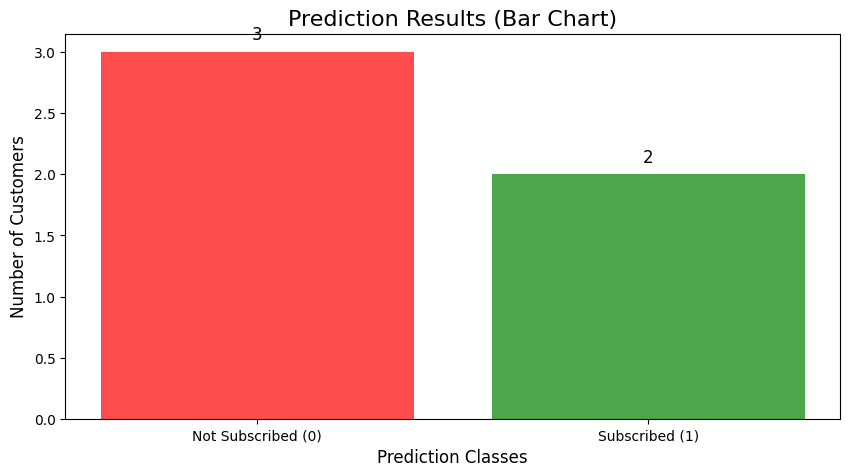

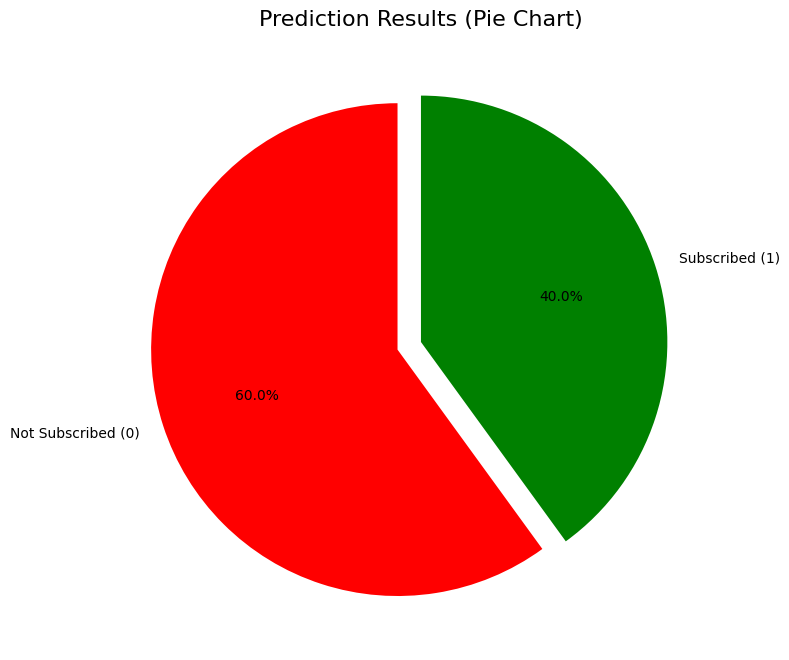

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Prediction results
predictions = [0, 0, 1, 0, 1]

# Count the occurrences of each class
unique, counts = np.unique(predictions, return_counts=True)
prediction_counts = dict(zip(unique, counts))

# Labels for the chart
labels = ['Not Subscribed (0)', 'Subscribed (1)']
sizes = [prediction_counts.get(0, 0), prediction_counts.get(1, 0)]

# Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color=['red', 'green'], alpha=0.7)
plt.title('Prediction Results (Bar Chart)', fontsize=16)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Prediction Classes', fontsize=12)
for i, v in enumerate(sizes):
    plt.text(i, v + 0.1, str(v), ha='center', fontsize=12)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['red', 'green'],
    explode=(0.1, 0)
)
plt.title('Prediction Results (Pie Chart)', fontsize=16)
plt.show()


#16. Interpretation of Results (Conclusion)


* Model Performance:

The bar and pie charts show the predicted counts for subscribers (1) and non-subscribers (0).

A model predicting mostly non-subscribers could indicate poor recall for subscribers.

* Dataset Limitations:

Class Imbalance: If non-subscribers dominate the data, the model may fail to capture subscribers well.

* Feature Quality:

The current features may not fully explain the subscription decision.

* Recommendations:

1. Balance the Data: Use techniques like oversampling or undersampling to handle class imbalance.

2. Improve Features: Add relevant features to improve predictions.

3. Evaluate Thoroughly: Use cross-validation and multiple metrics for better performance assessment.

#17. Future Work

1. Deep Learning Exploration: Test neural networks for potentially higher accuracy with complex patterns.

2. Model Updates: Regularly update with new data to maintain accuracy.

3. Class Imbalance: Use techniques like SMOTE or undersampling to balance the dataset and improve recall for subscribers.

4. Feature Expansion: Add more relevant features (e.g., user behavior, demographics) to boost predictive power.